# 0. 들어가기

**‘통계학자’ 나이팅게일의 ‘로즈 다이어그램’**

![나이팅게일의 Rose diagram. 시각화를 이용해 전쟁 중 부상으로 인한 사망자보다 병원 등의 위생 문제로 인한 사망자가 더 많다는 것을 보여준다.](https://assets-maharam-prod.s3.amazonaws.com/images/story_images/large/1182/maharam-stories_web-01.jpg?1588684887)

* [Florence Nightingale’s “Rose” Diagram](https://www.maharam.com/stories/sherlock_florence-nightingales-rose-diagram#stories-carousel)

**데이터 시각화란?**

* 데이터가 가지고 있는 정보를 잘 표현할 수 있도록 시각적으로 표현하는 과정
* 데이터를 분석하는 초기 과정에서 유용한 탐색적 데이터 분석(exploratory data analysis, EDA) 도구로 사용
* 분석중 또는 분석을 마친 후 결과를 효과적으로 확인하고 다른 사람에게 전달

**데이터 시각화가 필요한 이유**

* 데이터의 기본적인 상태 확인: 통계량, 결측치, 이상치(outlier) 등 확달
* 데이터 전처리에 도움(보통 전처리 과정과 동시에 진행)
* 본격적인 분석을 하고 모델을 만드려면 가정이 필요한데, 데이터를 더 잘 이해하여 그 가정을 세우는 데에 도움을 줌
* 최종 결과를 효과적으로 표현, 전달

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2


Colab 사용시 편의를 위해 글꼴 및 데이터 파일을 다운로드합니다.
로컬 환경에서 실행하시는 경우는 로컬에 설치된 글꼴을 사용하시거나, 저장장치에 미리 다운로드한 파일을 쓰시면 됩니다.

# 1. 한글과 마이너스 깨짐 해결

In [3]:
# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 2. 데이터에 속지 마세요

## 2.1 datasaurus

In [4]:
datasaurus = pd.read_csv("../data/datasaurus.csv", encoding="utf-8")
datasaurus

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [5]:
datasaurus["dataset"].value_counts()

dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: dataset, dtype: int64

In [6]:
## datasaurus의 'dataset' feature에 어떤 값이 있는지 보고 싶다면?
datasaurus["dataset"].value_counts()

dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: dataset, dtype: int64

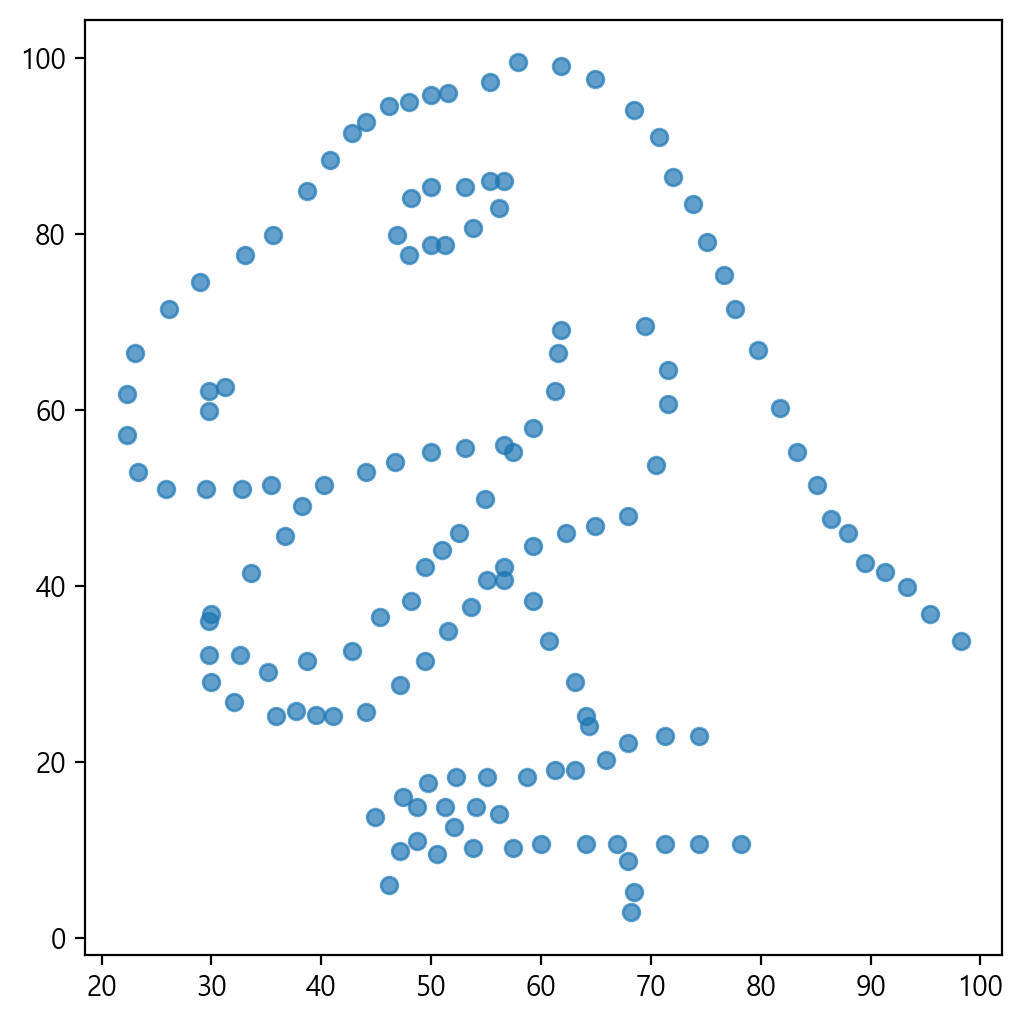

In [7]:
# dino만 그려보자

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(datasaurus[datasaurus["dataset"] == "dino"]["x"],
           datasaurus[datasaurus["dataset"] == "dino"]["y"],
           alpha = 0.7)
pass

In [8]:
## dino 말고 다른 dataset을 그려보자. 

In [9]:
datasaurus["dataset"].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

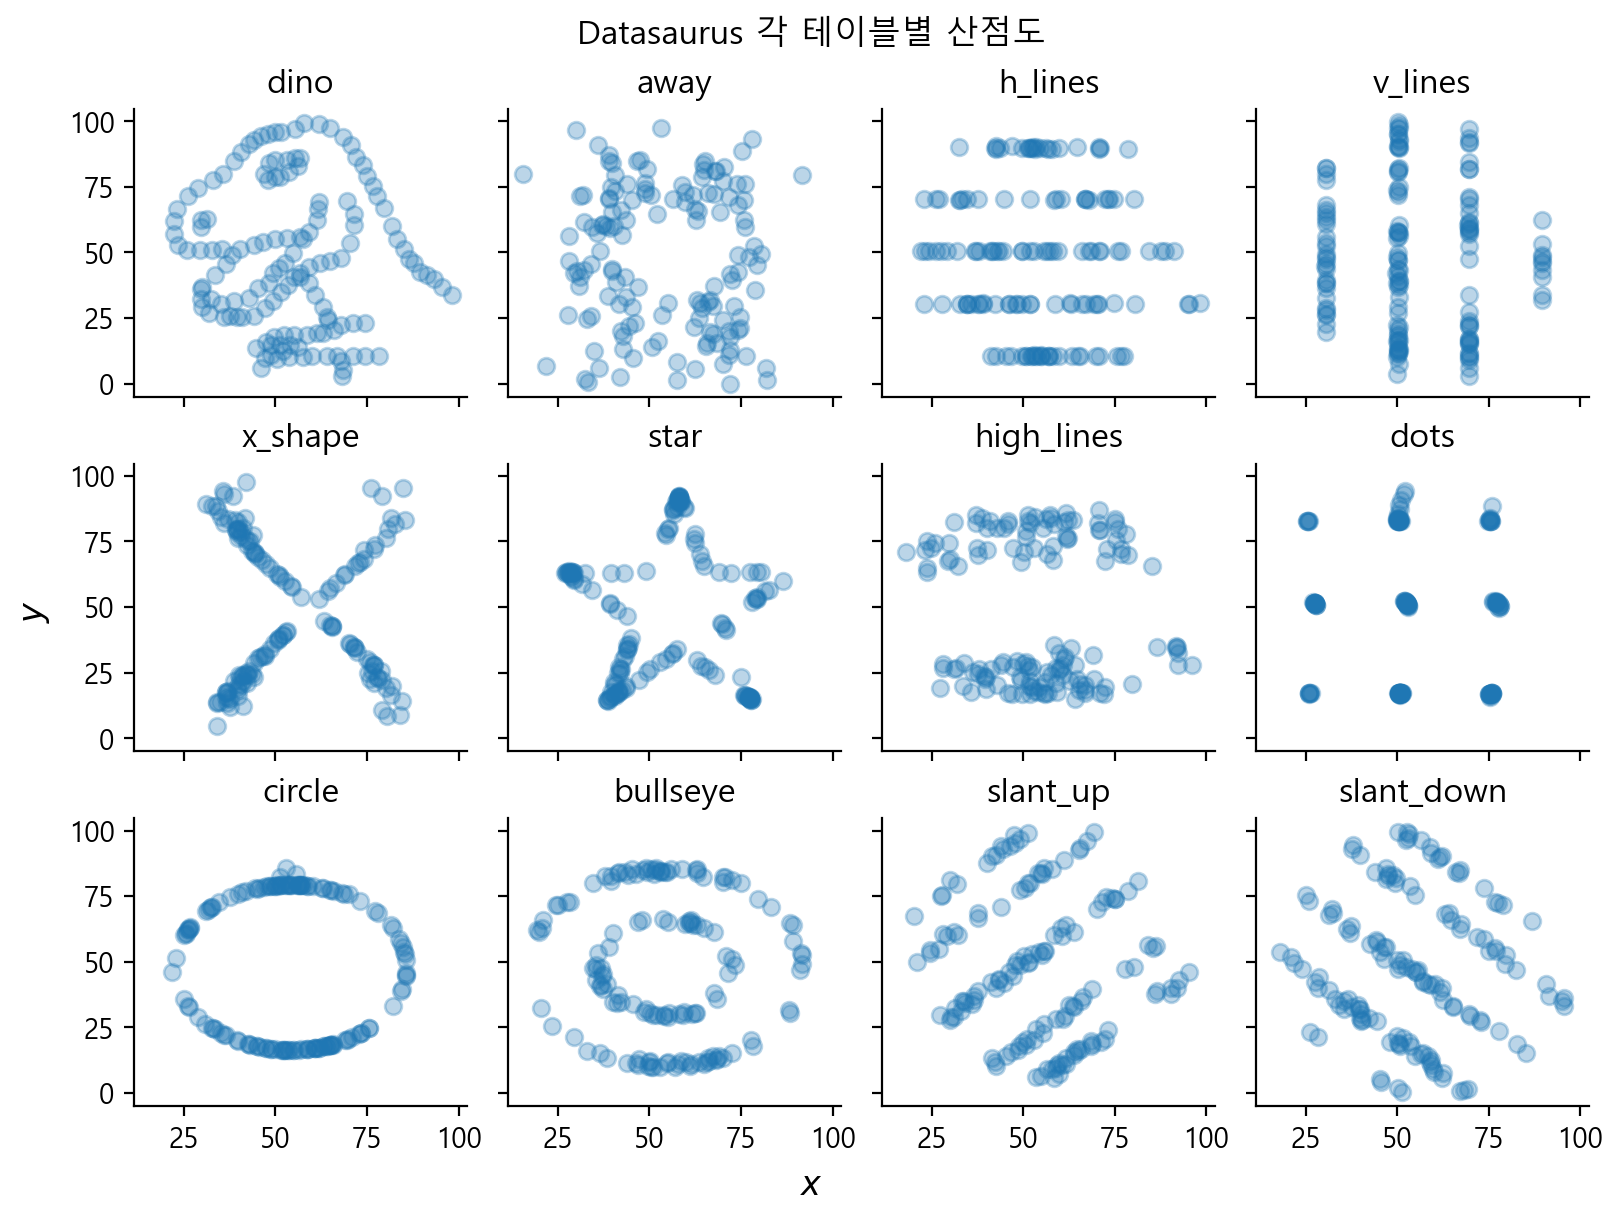

In [10]:
## 모든 데이터에 대해서 그려보자

fig, axes = plt.subplots(3, 4, figsize=(8, 6), sharex=True, sharey=True)

for dataset, ax in zip(datasaurus["dataset"].unique(), axes.flat):
    ax.scatter(datasaurus[datasaurus["dataset"] == dataset]["x"], 
               datasaurus[datasaurus["dataset"] == dataset]["y"], 
               alpha=0.3)
    ax.set_title(dataset)
    ax.spines[["top", "right"]].set_visible(False)

fig.suptitle("Datasaurus 각 테이블별 산점도")
fig.supxlabel(R"$x$")
fig.supylabel(R"$y$")
pass

In [11]:
datasaurus.groupby(["dataset"]).agg(["mean", "std"]).style.format("{:.3f}")

## 2.2 카토그램

* 특정한 데이터 값에 따라 지도의 면적을 왜곡한 그림


<img src="https://i.namu.wiki/i/o5oF66HKdCjmBTS1Gwz_XX2wPHLvOKwiTqljnUCWQmiGZTGKdwKfe6Q3TGZopcKNdVXJcWGP3I_TwGBN-FLA6-4OLIFp_Mo0vHT4W-13zIqcgcE_tCwwVJOKhrbo713fn9_Jec6KqpW812q1ZZQ1tg.webp" alt="인구 기반 세계 지도" width="640">

* [카토그램](https://namu.wiki/w/%EC%B9%B4%ED%86%A0%EA%B7%B8%EB%9E%A8)


<img src="https://i.namu.wiki/i/wGSdRYAQX5mNB53q8b6wyfvNfbCQL4ra-xB3rf8ayb-d89gEJ9nVDXLSvuWaXEFKWZyqDDFuePa3QT0z7GSe7-mtPqUu7DBiBZpHiBs_DHgxAk6EVqvOdZm-tVGDqUnTSwFW61dlkyDcnVTFB4mprw.svg" alt="실제 지도를 기준으로 정당을 채색" width="300">

<img src="https://i.namu.wiki/i/Ss1Pfg-B6R1VencIygEI9OtEkGiJ-E_Gu0VDsmvA0avxoJ08--P_gVsOjGhuk2bBx3VsYFWoo5mWAQSHEIU3aSWhayido3GcMhPJxiK9x_TDE76nh7T016gkrb7ReFNeoxT1HnQbd4gFF6iZz-BGKg.webp" alt="선거구를 같은 크기로 재구성하여 채색" width="300">

## 2.3 잘못된 시각화
<img src="https://dimg.donga.com/wps/NEWS/IMAGE/2023/01/27/117596693.1.jpg" alt="반도체" width="300">

* [반도체 최악한파...메모리 재고 넉달치 쌓였다](https://www.donga.com/news/Economy/article/all/20230127/117596696/1)


# 3. Matplotlib

* [Matplotlib](https://matplotlib.org/)은 파이썬용 시각화 라이브러리
* `pylab`이 들어가는 코드를 보았다면 아주 오래전 작성된 코드로, 참고하지 않을 것을 권장

## 3.1 선 그래프: [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

* 주로 연속(시간 등)으로 수집된 데이터나, 좌표평면 위에서 순서대로 이동하는 데이터를 표현
* 선(line)과 마커(markers)에 차이를 줄 수 있습니다.
    * 마커: [`marker`](https://matplotlib.org/stable/api/markers_api.html), `markersize`(`ms`), `markerfacecolor`(`mfc`), ...
    * 선: [`linestyle`(`ls`)](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), `linewidth`(`lw`), `color`(`c`), ...
  
* 그래프에는 제목(title), 축 이름(axis label)은 항상 포함

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png" alt="Anatomy of a figure" width="640">

― [Anatomy of a figure](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

In [12]:
# 데이터
x = np.linspace(-2, 2)
x_squared = 0.5 * x ** 2
cosine_x = np.cos(2 * x)

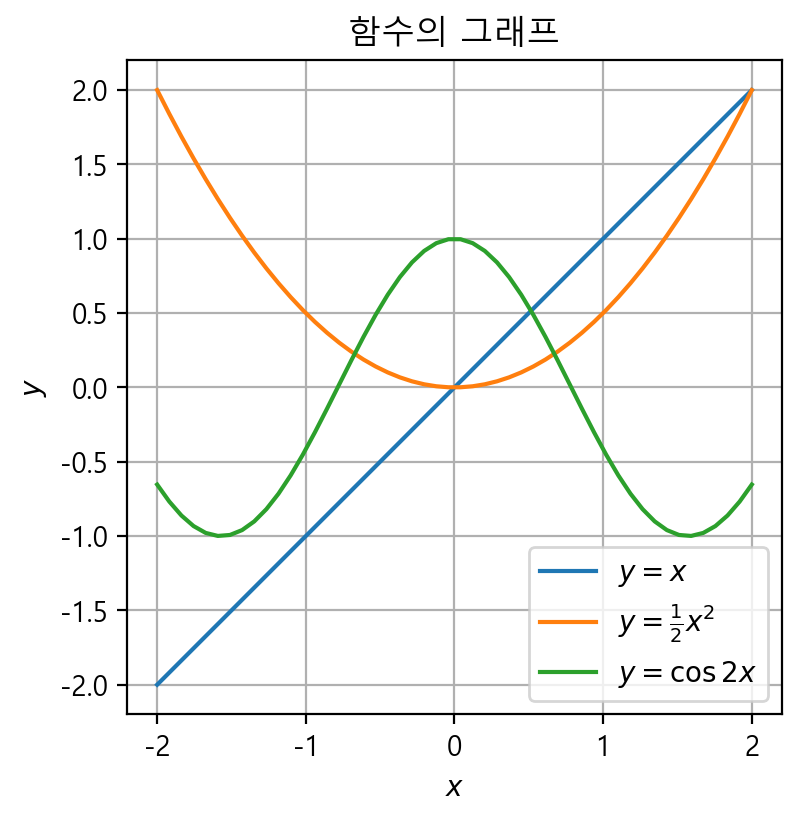

In [13]:
# 시각화
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, x, label=R"$y = x$")
ax.plot(x, x_squared, label=R"$y = \frac{1}{2} x^2$")
ax.plot(x, cosine_x, label=R"$y = \cos 2x$")
ax.set(xlabel=R"$x$", ylabel=R"$y$", title="함수의 그래프", aspect=1)   # aspect: 눈금의 비율(x:y = 1:2)
ax.grid()
ax.legend();

* 마커와 선의 변화

In [14]:
# 데이터
t = np.linspace(0, 4 * np.pi, 20)
y_blue = np.sin(t)
y_red = t ** 2 / 100
y_green = np.sin(1.5 * t) - 0.1 * t

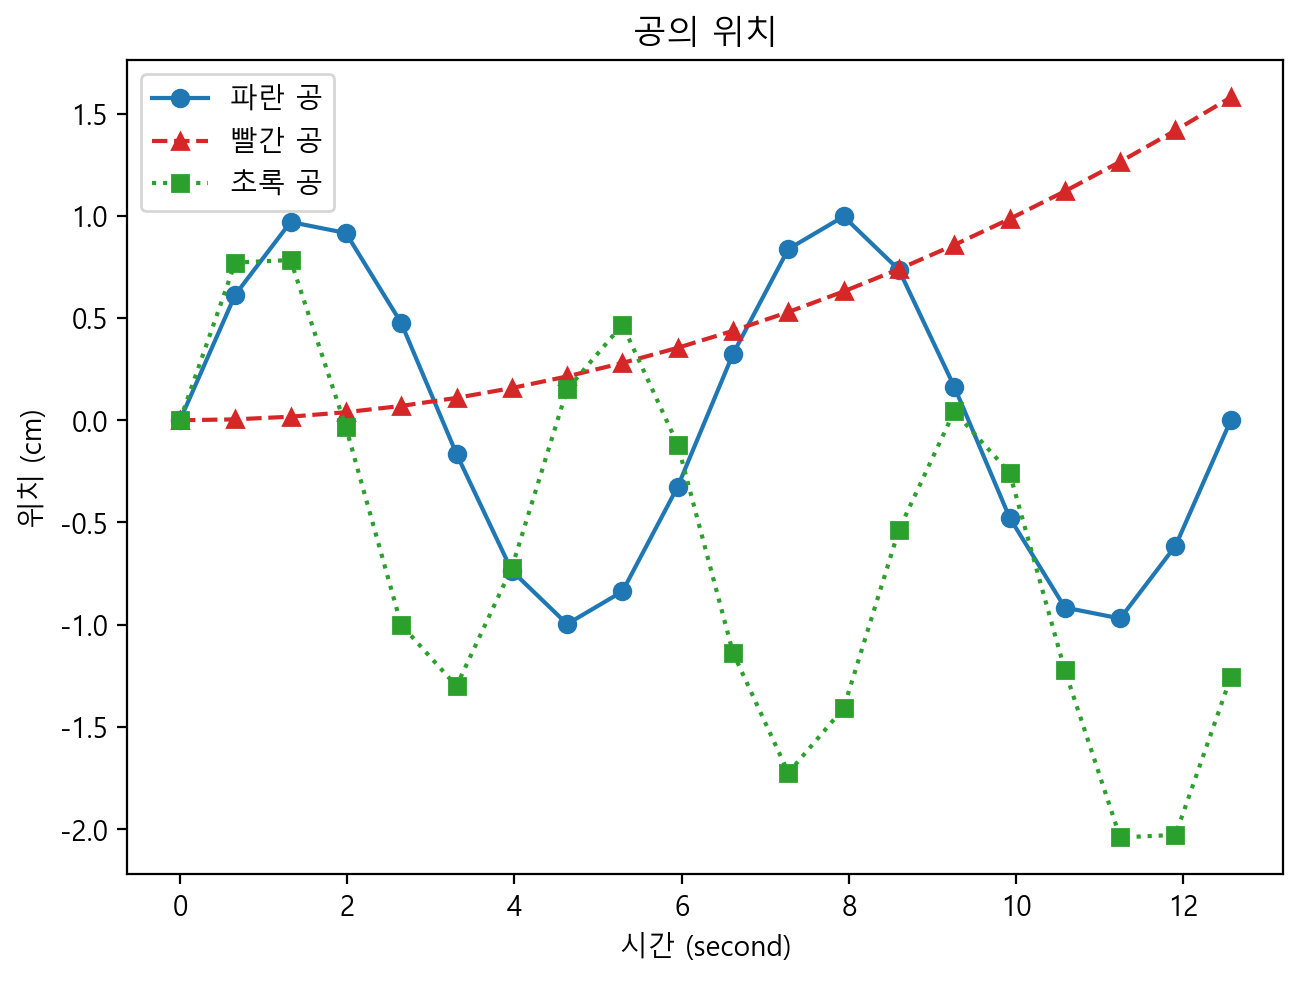

In [15]:
# 선 그래프 그리기
fig, ax = plt.subplots()
ax.plot(t, y_blue, marker="o", ls="-", c="tab:blue", label="파란 공")
ax.plot(t, y_red, marker="^", ls="--", c="tab:red", label="빨간 공")
ax.plot(t, y_green, marker="s", ls=":", c="tab:green", label="초록 공")
ax.set_xlabel("시간 (second)")
ax.set_ylabel("위치 (cm)")
ax.set_title("공의 위치");
ax.legend();
# 또는
# ax.set(
#     xlabel="시간 (second)",
#     ylabel="위치 (cm)",
#     title="공의 위치",
# )

In [16]:
# 하트 방정식

t = np.linspace(0, 2 * np.pi)

x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

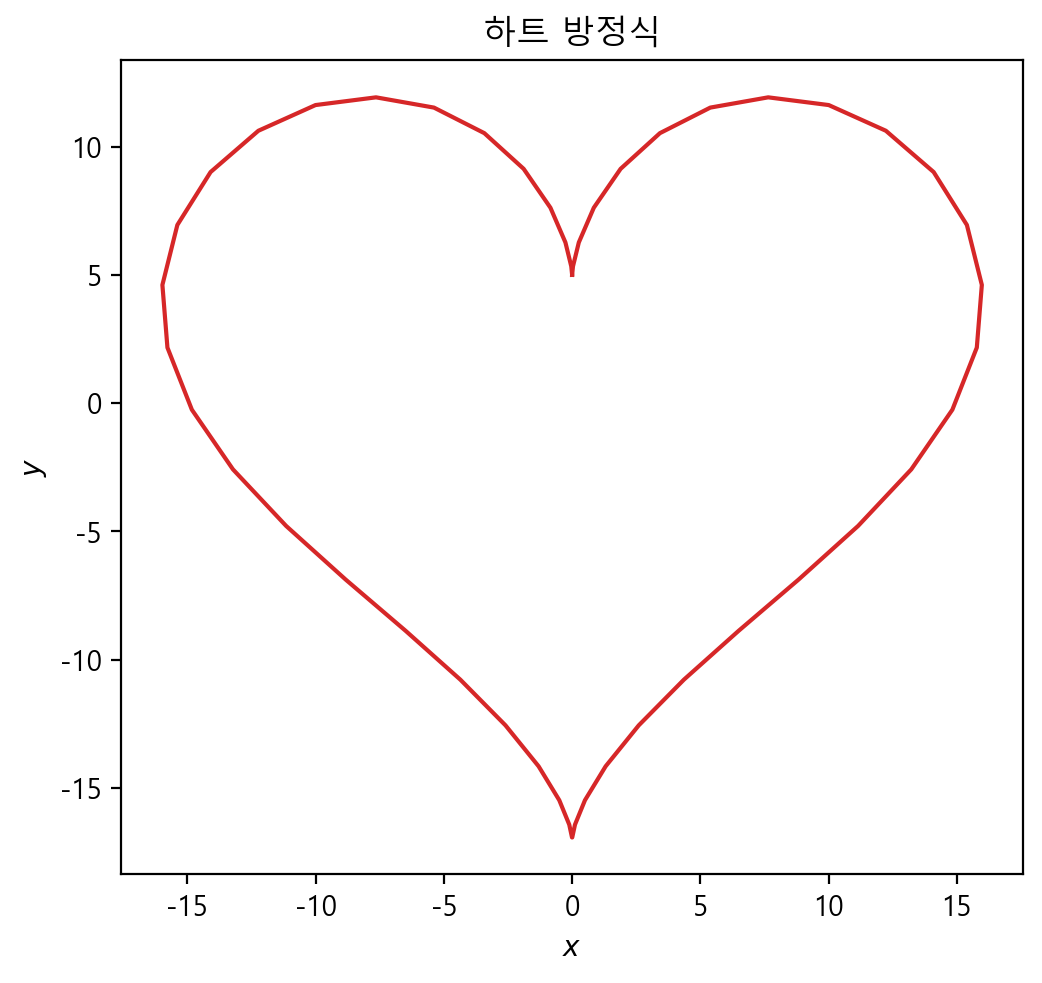

In [17]:
## 하트 방정식을 plot으로 그리시오.

fig, ax = plt.subplots()
ax.plot(x, y, ls="-", c="tab:red")
ax.set(
    xlabel=R"$x$",
    ylabel=R"$y$",
    title="하트 방정식",
)
ax.set_aspect("equal");

* 거의 모든 Matplotlib의 그래프를 그리는 함수가 이와 비슷한 형식을 따름
```python
ax.그래프종류(데이터, [추가데이터, ...,] 옵션1=값1, 옵션2=값2, ...)
```

* Jupyter notebook 환경에서, 마지막 표현식이 무언가를 반환하여(즉, 셀 결과로 출력되어) 보기 좋지 않은 경우, 세미콜론(`;`)을 붙이거나, `pass`(no operation)을 붙여서 출력되지 않게 할 수 있음

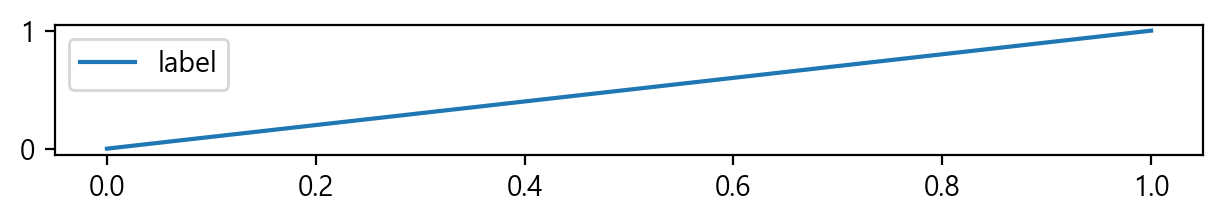

In [18]:
fig, ax = plt.subplots(figsize=(6, 1))

# ax.plot([시점의 x좌표,..., 종점의 x좌표], [시점의 y좌표,..., 종점의 y좌표])
ax.plot([0, 1], [0, 1], label="label")
ax.legend()  # <- Legend의 인스턴스를 반환(표현식)

## 3.2 산점도: [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

* 데이터 중 두 변수의 관계를 보고 싶을 때
* 마커 모양(`marker`), 크기(`s`), 색깔(`c`, `cmap`)로 추가로 또 다른 변수 정보를 표현할 수 있음

In [19]:
iris = pd.read_csv("../data/Iris.csv",
                  encoding="utf-8",
                  index_col = 0)

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


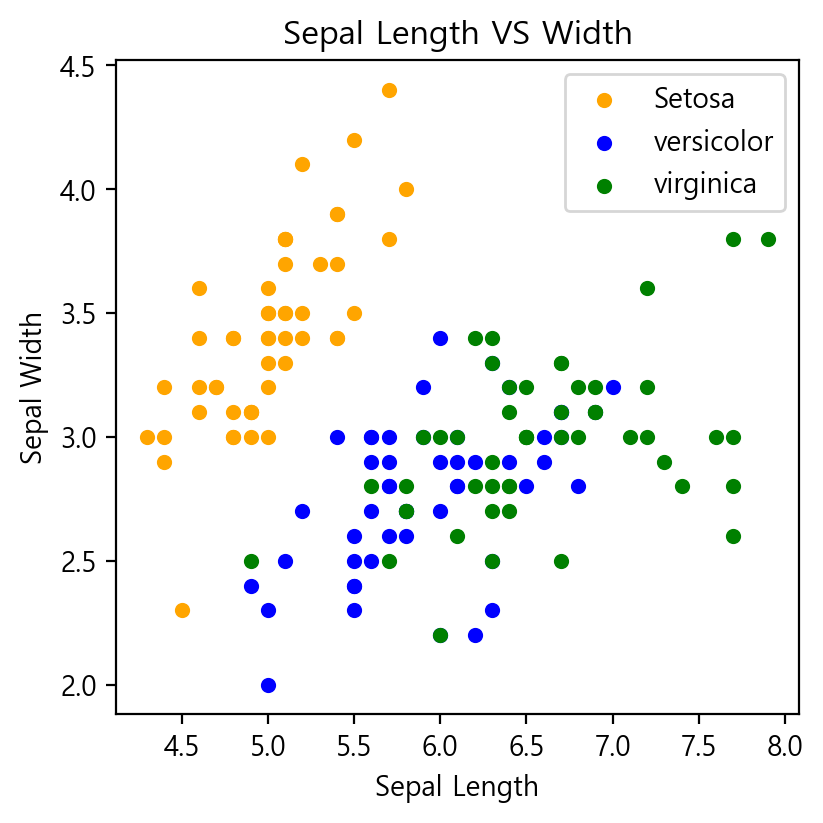

In [20]:
#kaggle
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

In [21]:
feature_x = "SepalLengthCm"
feature_y = "SepalWidthCm"
feature_additional = "PetalWidthCm"

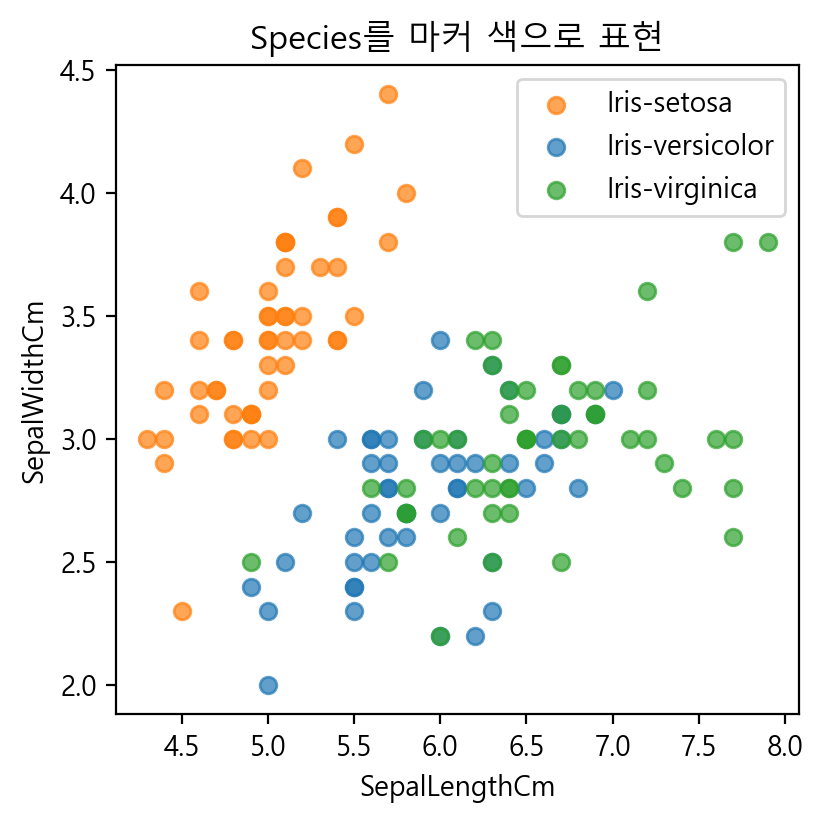

In [22]:
## 위의 그래프를 matplotlib을 이용해서 그리시오.
fig, ax = plt.subplots(figsize=(4, 4))

for s, c in zip(iris["Species"].unique(), ["tab:orange", "tab:blue", "tab:green"]):
    ax.scatter(iris[iris["Species"] == s][feature_x],
               iris[iris["Species"] == s][feature_y],
               color=c,
               alpha=0.7,
               label=s)

ax.set(xlabel=feature_x,
       ylabel=feature_y,
       title="Species를 마커 색으로 표현")

ax.legend();

In [23]:
feature_x = "SepalLengthCm"
feature_y = "SepalWidthCm"
feature_additional = "PetalWidthCm"

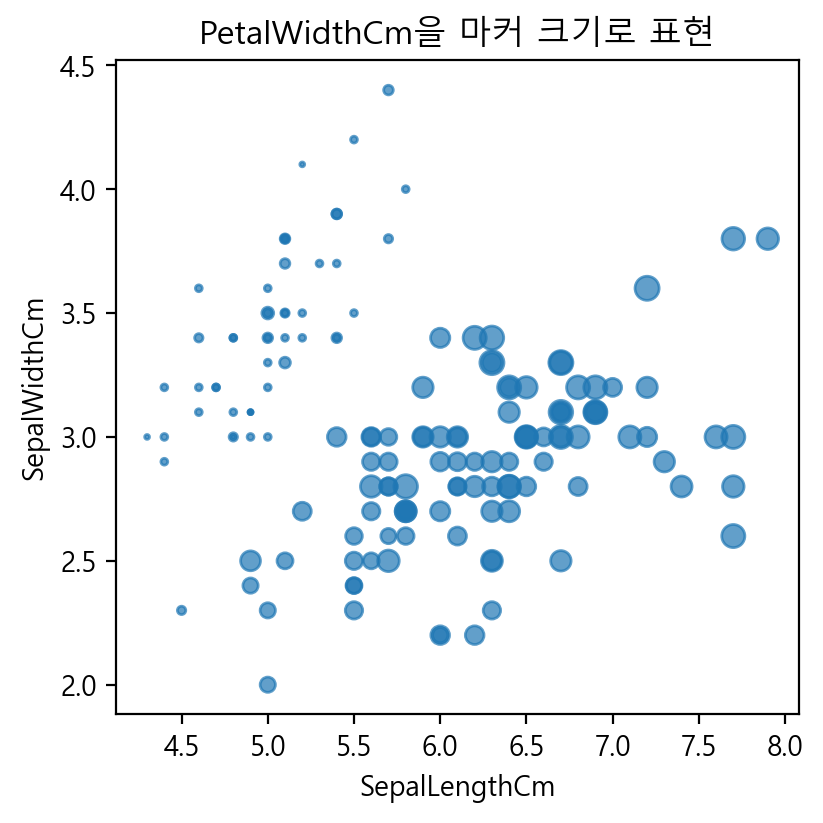

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))

# "PetalWidthCm"를 반영한 마커 크기 정의
marker_size_factor = (plt.rcParams["lines.markersize"] ** 2 / iris[feature_additional].mean())
    
ax.scatter(iris[feature_x],
           iris[feature_y],
           s = marker_size_factor * iris[feature_additional],
           alpha=0.7)
    
ax.set(xlabel=feature_x,
       ylabel=feature_y,
       title=f"{feature_additional}을 마커 크기로 표현");

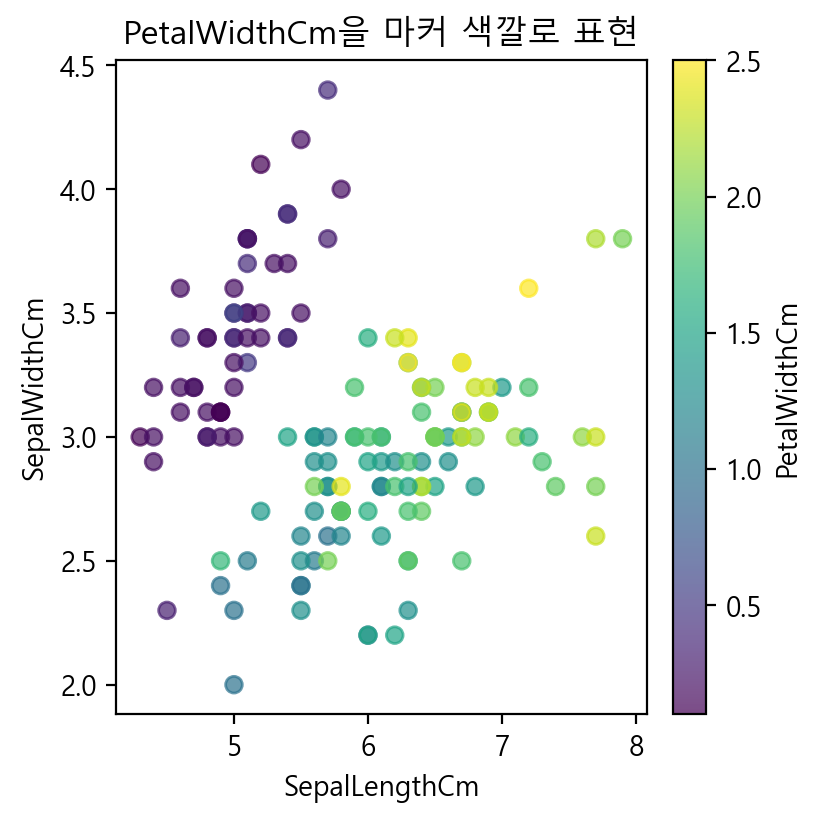

In [25]:
# 마커의 색으로 표현
fig, ax = plt.subplots(figsize=(4, 4))

pc = ax.scatter(iris[feature_x],
            iris[feature_y],
            c=iris[feature_additional],
            cmap="viridis",
            alpha=0.7)

ax.set(xlabel=feature_x,
        ylabel=feature_y,
        title=f"{feature_additional}을 마커 색깔로 표현")

colorbar = fig.colorbar(pc, label=feature_additional);

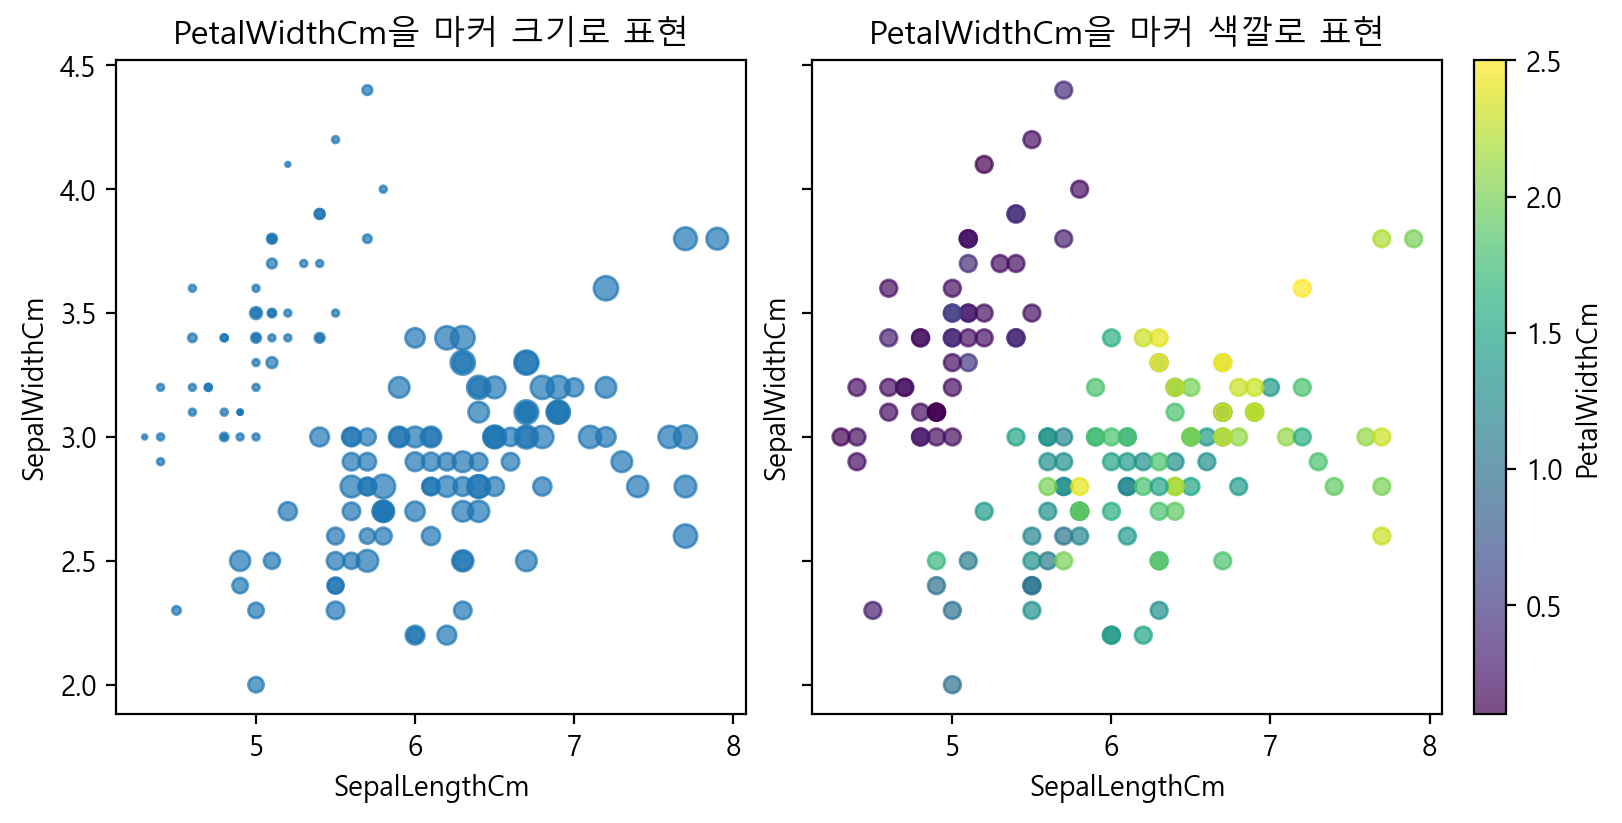

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

marker_size_factor = (plt.rcParams["lines.markersize"] ** 2 / iris[feature_additional].mean())

ax1.scatter(iris[feature_x],
           iris[feature_y],
           s = marker_size_factor * iris[feature_additional],
           alpha=0.7)
    
ax1.set(xlabel=feature_x,
       ylabel=feature_y,
       title=f"{feature_additional}을 마커 크기로 표현")

pc = ax2.scatter(iris[feature_x],
            iris[feature_y],
            c=iris[feature_additional],
            cmap="viridis",
            alpha=0.7)

ax2.set(xlabel=feature_x,
        ylabel=feature_y,
        title=f"{feature_additional}을 마커 색깔로 표현")

colorbar = fig.colorbar(pc, label=feature_additional);

**데이터 수가 아주 많거나 정확히 겹치는 데이터가 많은 경우**

* 데이터에 적절한 처리
    * ex: 노이즈 추가
* 산점도가 아닌 다른 시각화를 사용
    * ex: 육각형 히스토그램

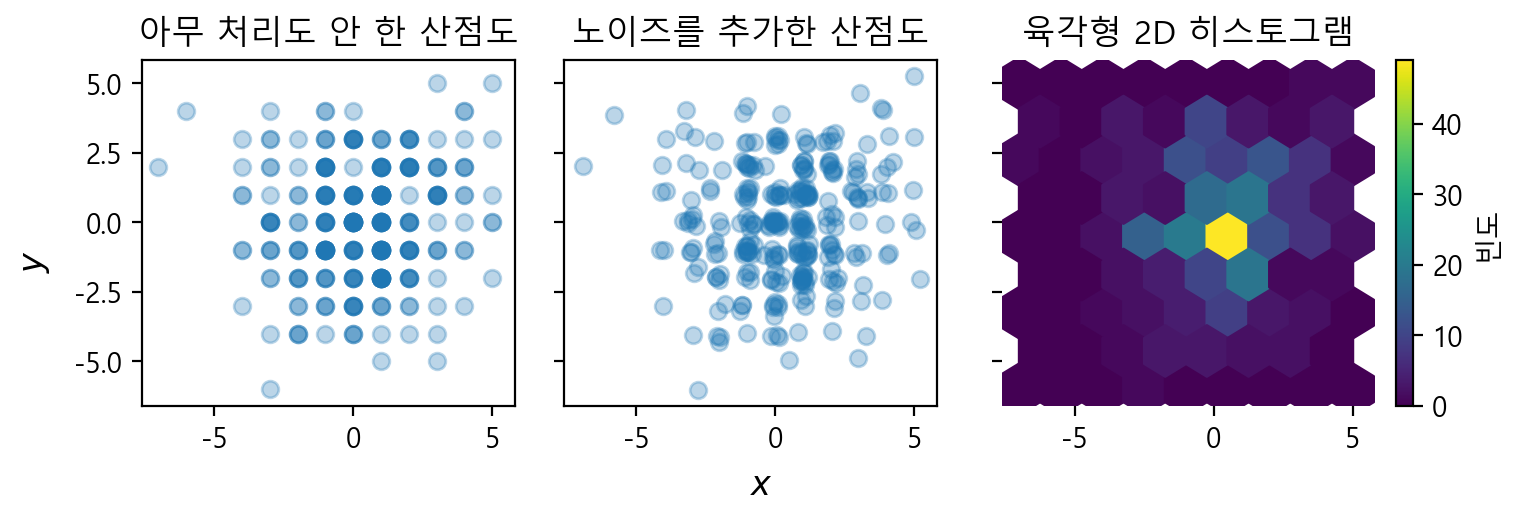

In [27]:
rng = np.random.default_rng(78)

n = 300
x = rng.normal(scale=2, size=n).round(decimals=0)
y = rng.normal(scale=2, size=n).round(decimals=0)

fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), sharex=True, sharey=True)

axes[0].scatter(x, y, alpha=0.3)
axes[0].set_title("아무 처리도 안 한 산점도")

noise_strength = 0.15
x_with_noise = x + rng.normal(scale=noise_strength, size=x.shape)
y_with_noise = y + rng.normal(scale=noise_strength, size=y.shape)
axes[1].scatter(x_with_noise, y_with_noise, alpha=0.3)
axes[1].set_title("노이즈를 추가한 산점도")

hb = axes[2].hexbin(x, y, gridsize=8)
fig.colorbar(hb, label="빈도")
axes[2].set_title("육각형 2D 히스토그램")
axes[2].spines[:].set_visible(False)

for ax in axes.flat:
    ax.set_aspect("equal")

fig.supxlabel(R"$x$")
fig.supylabel(R"$y$")
pass

## 3.3 막대 그래프: [`bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html), [`barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html)

* 데이터의 값에 비례하는 길이의 막대로 표현하는 그래프
* ‘양의 비교’에 용이

In [28]:
film_title = [
    "명량",
    "극한직업",
    "신과함께-죄와 벌",
    "국제시장",
    "어벤져스: 엔드게임",
    "겨울왕국 2",
    "베테랑",
    "아바타",
]

admissions = [
    17_613_682,
    16_264_944,
    14_410_754,
    14_257_115,
    13_934_592,
    13_747_792,
    13_414_372,
    13_338_863,
]

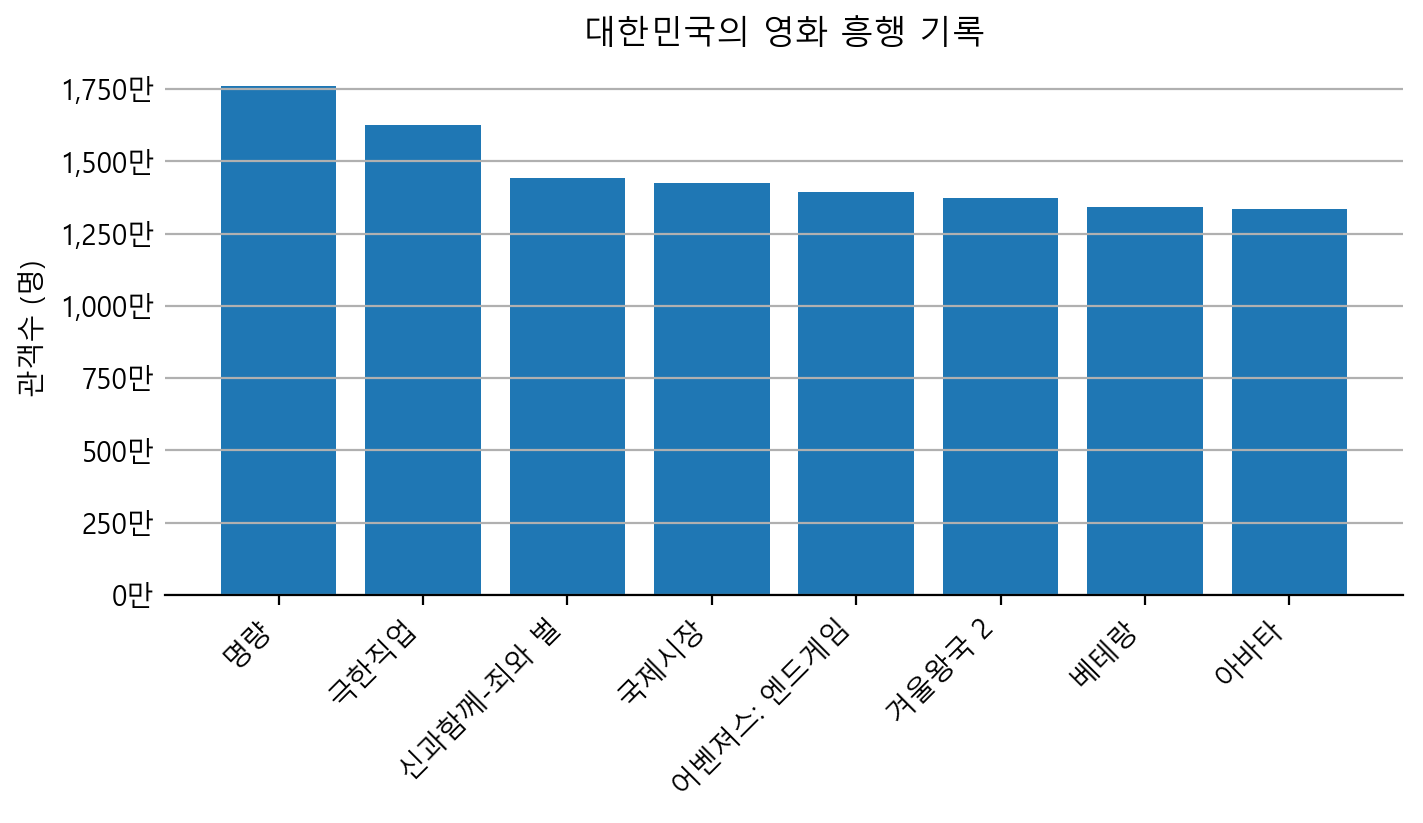

In [29]:
from matplotlib.ticker import FuncFormatter
admission_formatter = FuncFormatter(lambda x, pos: f"{x / 10000:,.0f}만")

fig, ax = plt.subplots(figsize=(7,4))

bc = ax.bar(film_title, admissions)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.set_major_formatter(admission_formatter)

ax.set(
    ylabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y")




* 항목(`ticklabel`) 이름이 긴 경우 rotation 가능
* x, y축을 바꾼 `barh`로 그릴수도 있음

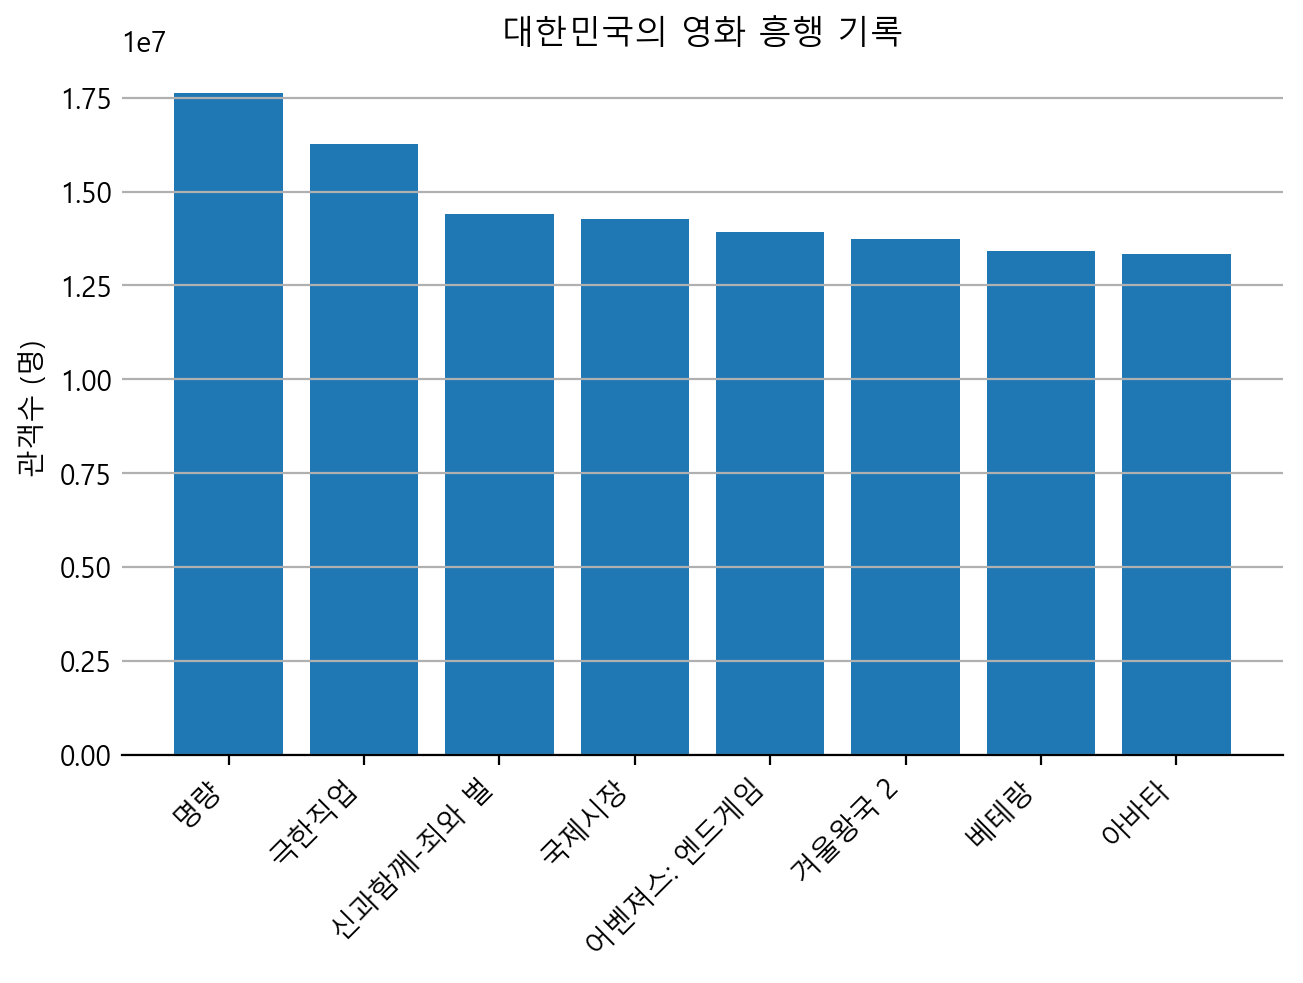

In [30]:
fig, ax = plt.subplots()

ax.bar(film_title, admissions)
ax.yaxis.set_tick_params(length=0)

ax.set(
    ylabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y")

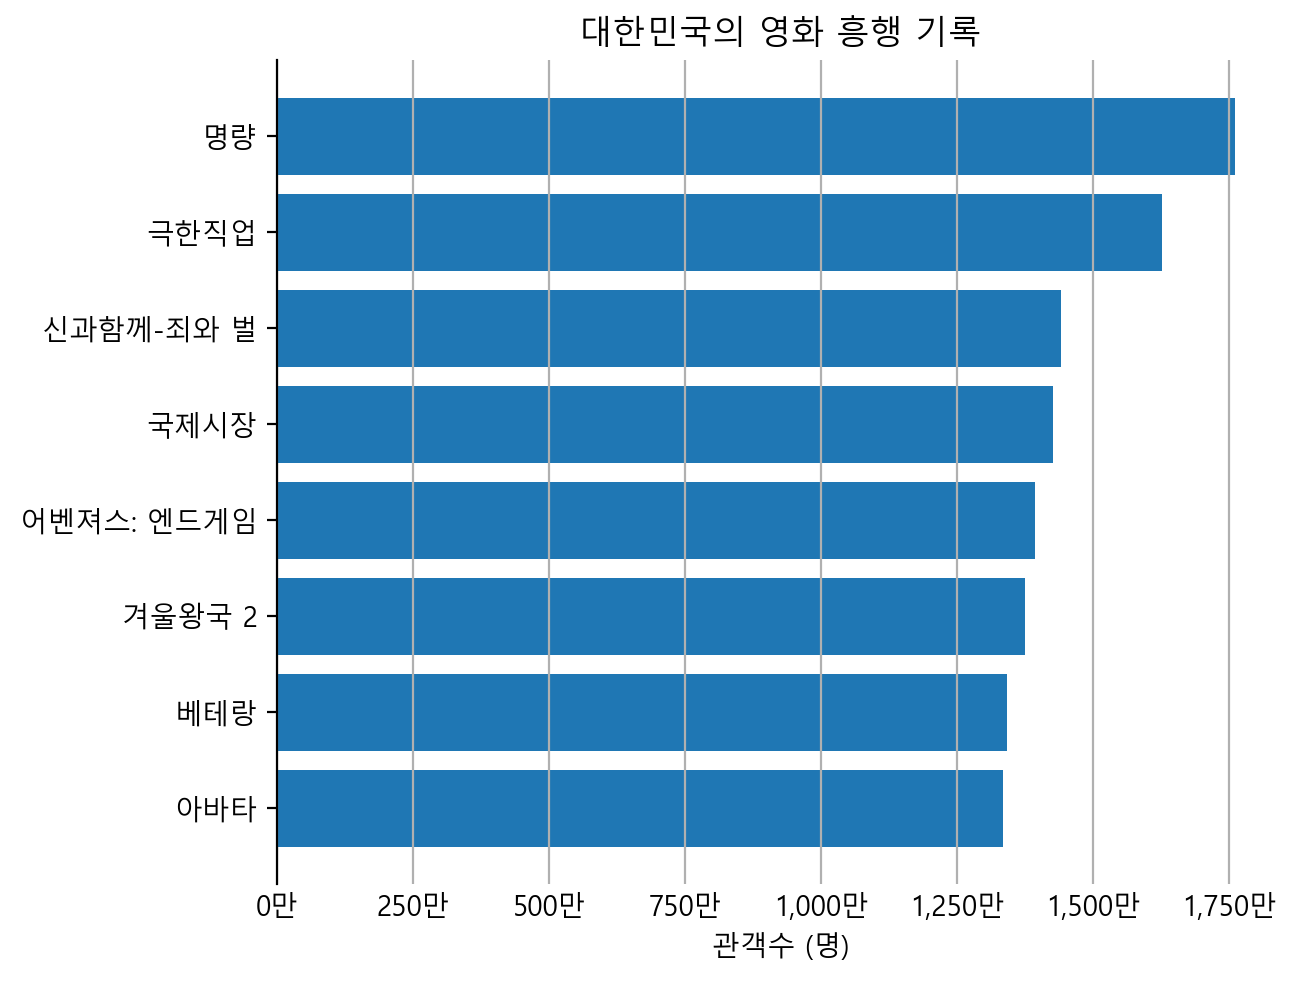

In [31]:
fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_major_formatter(admission_formatter)
ax.invert_yaxis()

ax.set(
    xlabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.grid(axis="x")

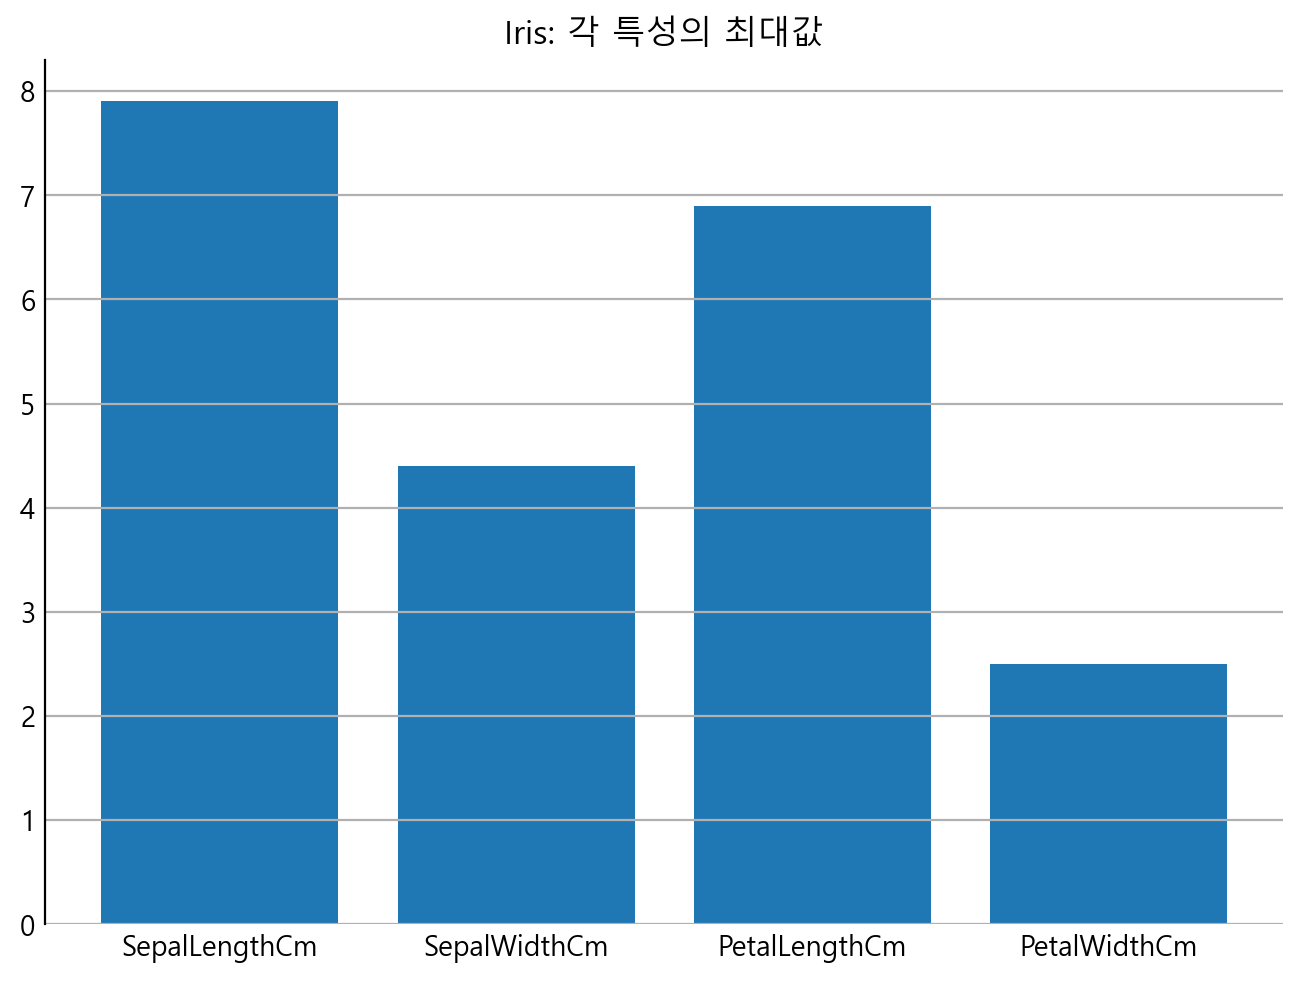

In [32]:
## Iris 데이터에서 각 특성의 최대값을 막대그래프로 그리시오.
fig, ax = plt.subplots()

ax.bar(iris.columns[:-1], iris.max()[:-1].values)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set(
    title="Iris: 각 특성의 최대값",
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.grid(axis="y")

* 막대 그래프의 막대는 0에서 시작

![](https://external-preview.redd.it/fZfi4sWRe_paJenx-EcvCSvZgpazXDo6q4q08dlEENE.jpg?auto=webp&s=8eb8f6ed7901c8d836ffc13a83bb5190ea657ce6)

![](https://cdn.mos.cms.futurecdn.net/cqjL53sxmHc7Rig9ZuZ2vb-970-80.jpg.webp)

![3D 파이 차트](https://i.namu.wiki/i/6uQwDob-AezcA-BWpXbZby3iE2eGcaVL_ttwUXtf1Vdvlz4Y-fgBRxETzBvHXc87uRaMSqBo9K4fZUBvJzPDB5aDkzn7euSzAXXx64HKqaDpk3LTFlRmFHoWuVZKBawNzpMi46n-6kO9gk4MZg-Arg.webp)

* [잘못된 그래프](https://namu.wiki/w/%EA%B7%B8%EB%9E%98%ED%94%84%20%EC%99%9C%EA%B3%A1)

## 3.4 히스토그램: [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)

* 특정 범위에 속하는 데이터 수를 막대 그래프를 이용하여 나타낸 것
* 눈금을 빈도수로 할지, 비율로 할지를 옵션 `density`로 선택할 수 있음
* 막대 그래프와 차이는 연속된 구간 안의 빈도나 비율을 나타내기 때문에 막대 사이 빈 공간이 없음
* 막대 그래프에서 막대의 폭은 의미가 없지만, 도수 분포 그래프는 막대의 양 끝 값이 중요
* 데이터의 분포나, 보고 싶은 내용에 따라 막대의 수(혹은 폭)를 조절

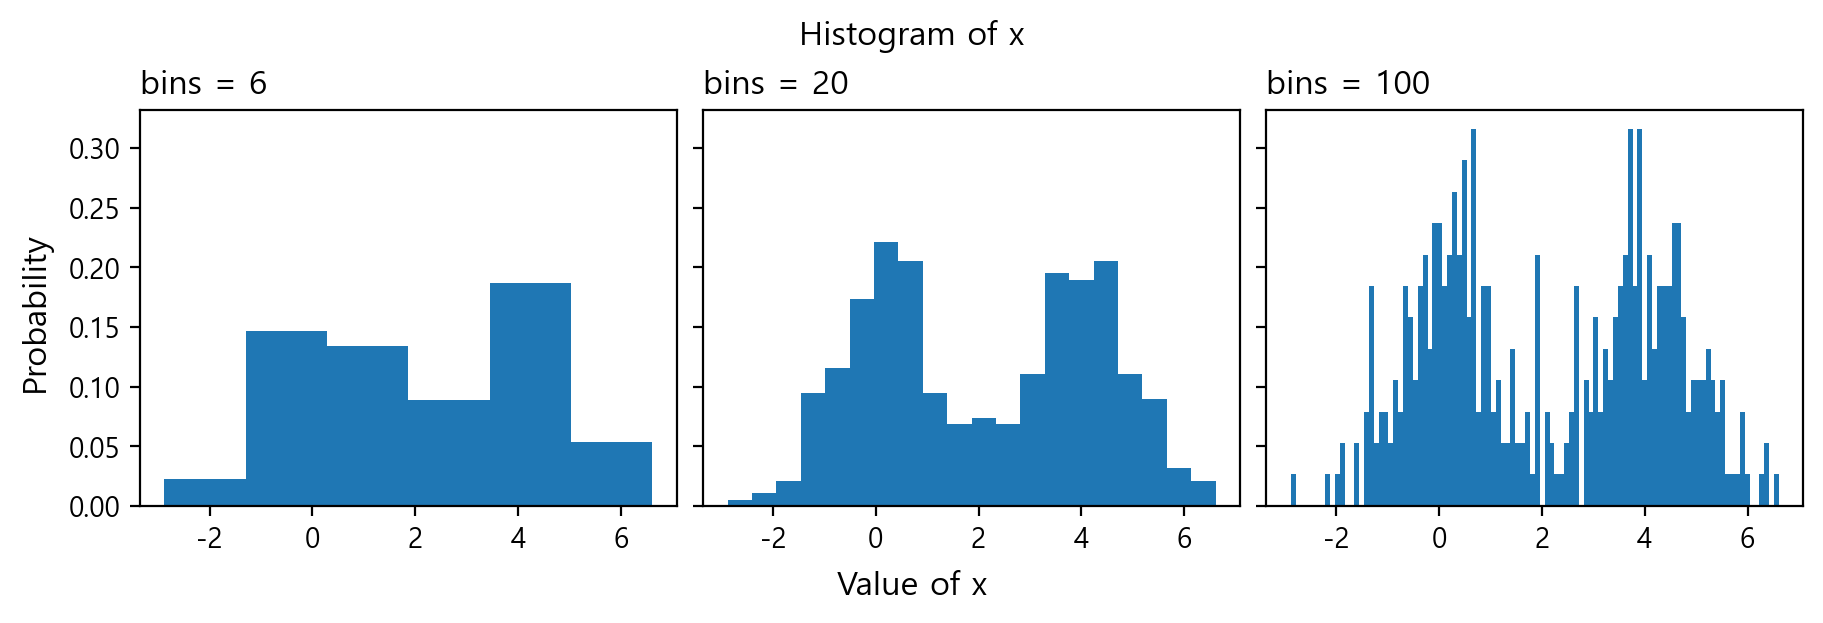

In [33]:
rng = np.random.default_rng(78)

n = 200
x = np.concatenate((rng.normal(loc=0, size=n), rng.normal(loc=4, size=n)))

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)

for bins, ax in zip([6, 20, 100], axes.flat):
    ax.hist(x, bins=bins, density=True)
    ax.set_title(f"bins = {bins}", loc="left")
fig.suptitle("Histogram of x")
fig.supxlabel("Value of x")
fig.supylabel("Probability")
pass

## 3.5 상자 그림(상자 수염 그림): [`boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

* 데이터 분포의 사분위값과 이상치(보통 1.5 IQR 기준)를 표현한 그래프
* 라이브러리마다 상자와 수염이 나타내는 수치의 의미가 조금씩 다르므로 정확한 값을 아는 것이 중요한 경우 주의
![](https://www.simplypsychology.org/boxplot-outliers.png)
* [Box Plot | Simply Psychology](https://www.simplypsychology.org/boxplots.html)

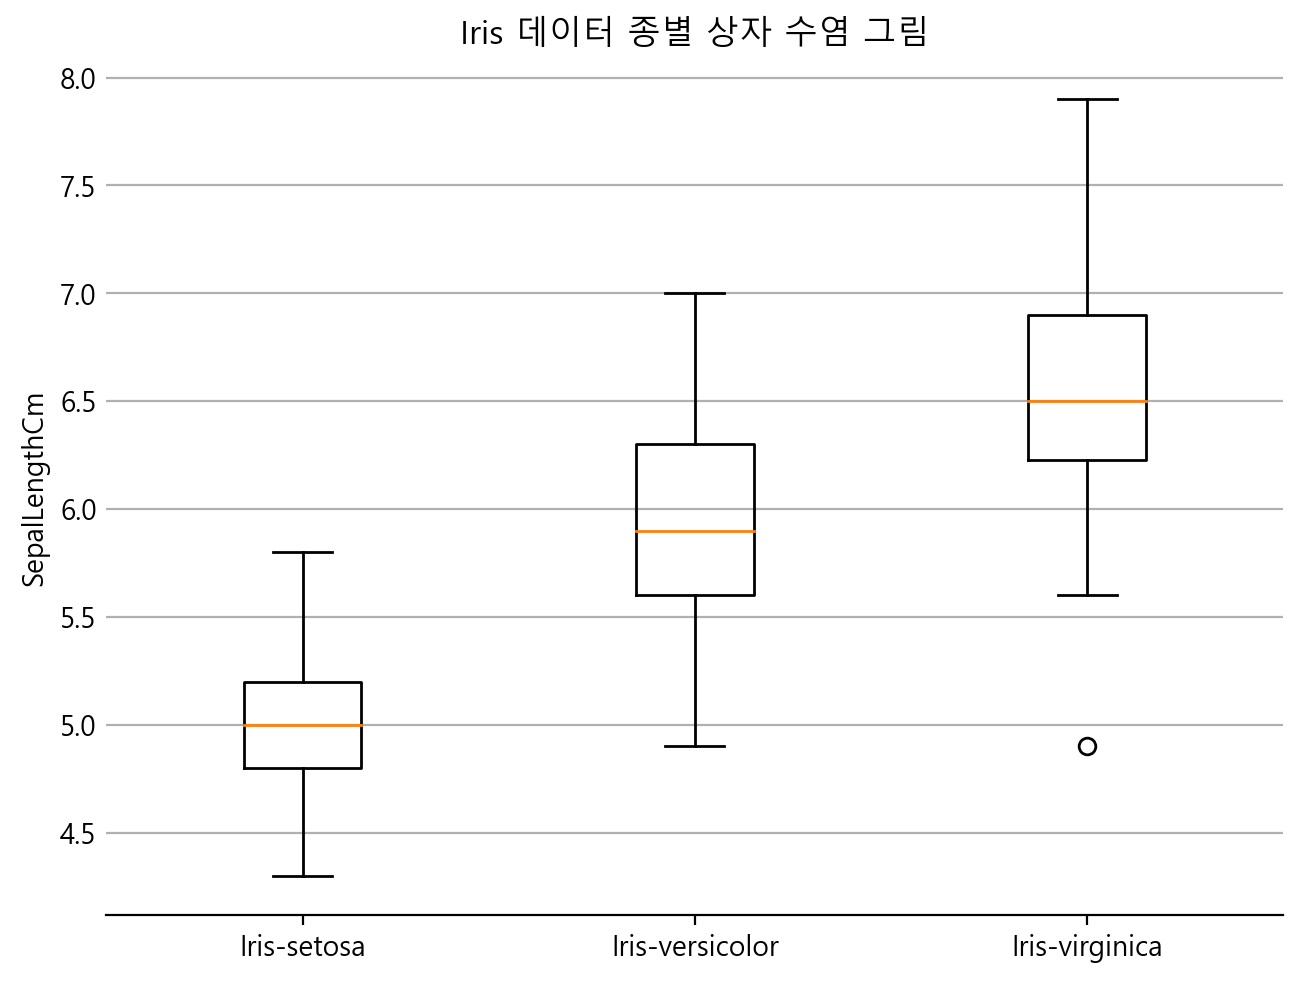

In [34]:
target_feature = "SepalLengthCm"

iris_groupby_species = {
    name: df[target_feature].to_numpy() for name, df in iris.groupby("Species")
}

fig, ax = plt.subplots()
ax.boxplot(iris_groupby_species.values(), labels=iris_groupby_species.keys())
ax.spines[["top", "right", "left"]].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.grid(axis="y")
ax.set(
    ylabel=target_feature,
    title="Iris 데이터 종별 상자 수염 그림",
)
pass

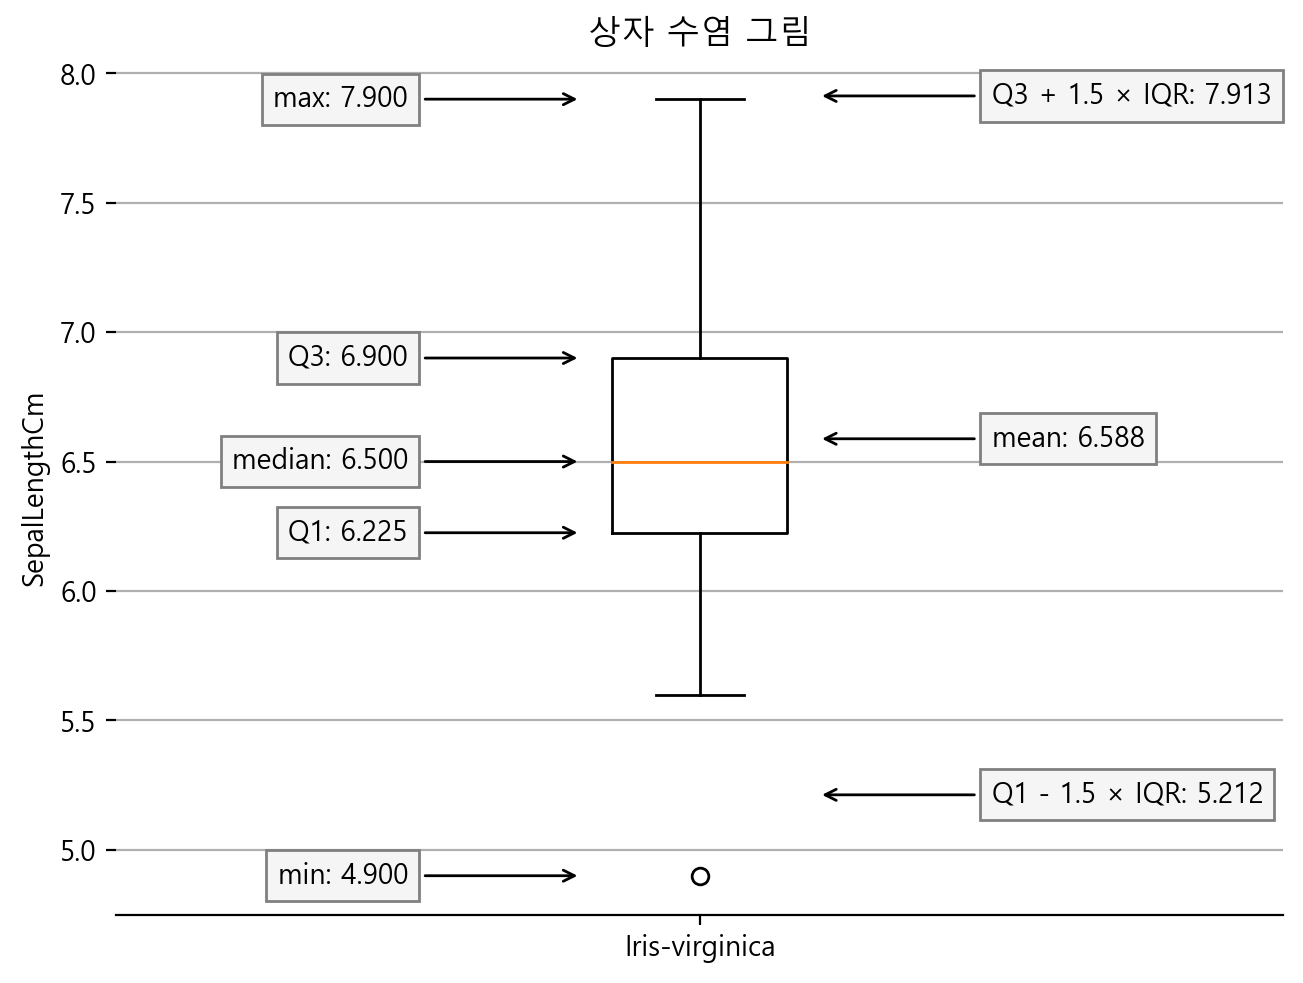

In [35]:
fig, ax = plt.subplots()

target_species = "Iris-virginica"

data = iris_groupby_species[target_species]

ax.boxplot(data, labels=[target_species])
ax.set(
    title="상자 수염 그림",
    ylabel=target_feature,
)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y")

annotation_options = {
    "va": "center",
    "arrowprops": {"arrowstyle": "->"},
    "bbox": {"fc": "whitesmoke", "ec": "gray"},
}
quantiles = np.quantile(data, [0, 0.25, 0.5, 0.75, 1])
for name, q in zip(["min", "Q1", "median", "Q3", "max"], quantiles):
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(0.9, q),
        xytext=(0.75, q),
        **annotation_options,
        ha="right",
    )

iqr = quantiles[3] - quantiles[1]
for name, q in [
    ["mean", data.mean().item()],
    ["Q3 + 1.5 × IQR", quantiles[3] + 1.5 * iqr],
    ["Q1 - 1.5 × IQR", quantiles[1] - 1.5 * iqr],
]:
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(1.1, q),
        xytext=(1.25, q),
        **annotation_options,
        ha="left",
    )

# 4. 색상 선택

* 상황에 맞는 색깔을 사용하면 시각화의 의도를 더 잘 전달할 수 있습니다.

**Matplotlib을 위한 간단 팁**

* 데이터와 관련하여 널리 통용되거나 의미있는 색이 있는 경우 해당 색깔을 기준으로 사용하는 것이 좋음
    * ex: 실물 색깔과 연관있는 데이터, 정당의 대표 색, 온도, 적자와 흑자, 주식 차트
    
* 최근에는 MATLAB과 Matplotlib을 포함한 많은 라이브러리가 색상에 신경을 많이 써서 기본값도 괜찮은 편
* 기본값을 쓰지 않고 직접 [색상](https://matplotlib.org/stable/tutorials/colors/colors.html)을 지정해야 하는 경우, `red`, `green`, `cyan` 등보다는 `tab:red`, `tab:green`, `tab:cyan`등 널리 알려진 팔레트 색상을 사용
* 현재 테마의 색상 기본값은 `C0`, `C1`, `C2`, ... 등으로 쓸 수 있습니다.
* 컬러맵은 [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)을 참고

**참고 자료**

* [Colorset - Collection of perceptually accurate colormaps](https://colorcet.holoviz.org/)
* [Turbo, An Improved Rainbow Colormap for Visualization](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html)
* [Color Blind Vision Simulator](https://pilestone.com/pages/color-blindness-simulator-1)

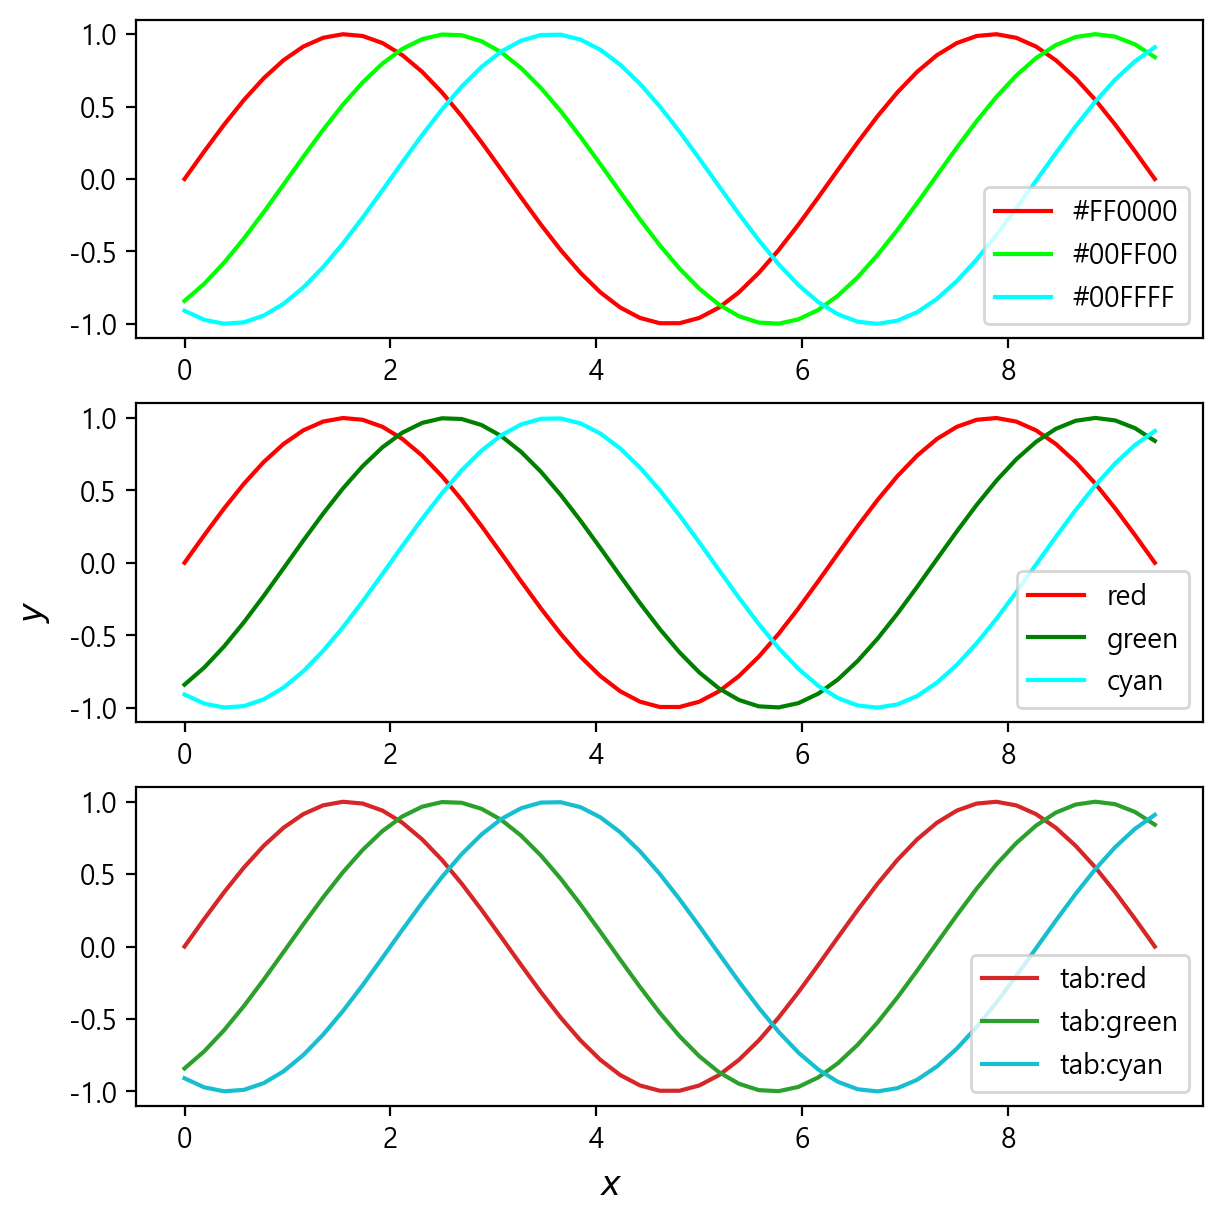

In [36]:
x = np.linspace(0, 3 * np.pi)
ys = [np.sin(x), np.sin(x - 1), np.sin(x - 2)]

fig, axes = plt.subplots(3, 1, figsize=(6, 6))

color_cycles = [
    ["#FF0000", "#00FF00", "#00FFFF"],
    ["red", "green", "cyan"],
    ["tab:red", "tab:green", "tab:cyan"],
]

for color_cycle, ax in zip(color_cycles, axes.flat):
    for y, color in zip(ys, color_cycle):
        ax.plot(x, y, c=color, label=color)
    ax.legend()
fig.supxlabel(R"$x$")
fig.supylabel(R"$y$")
pass

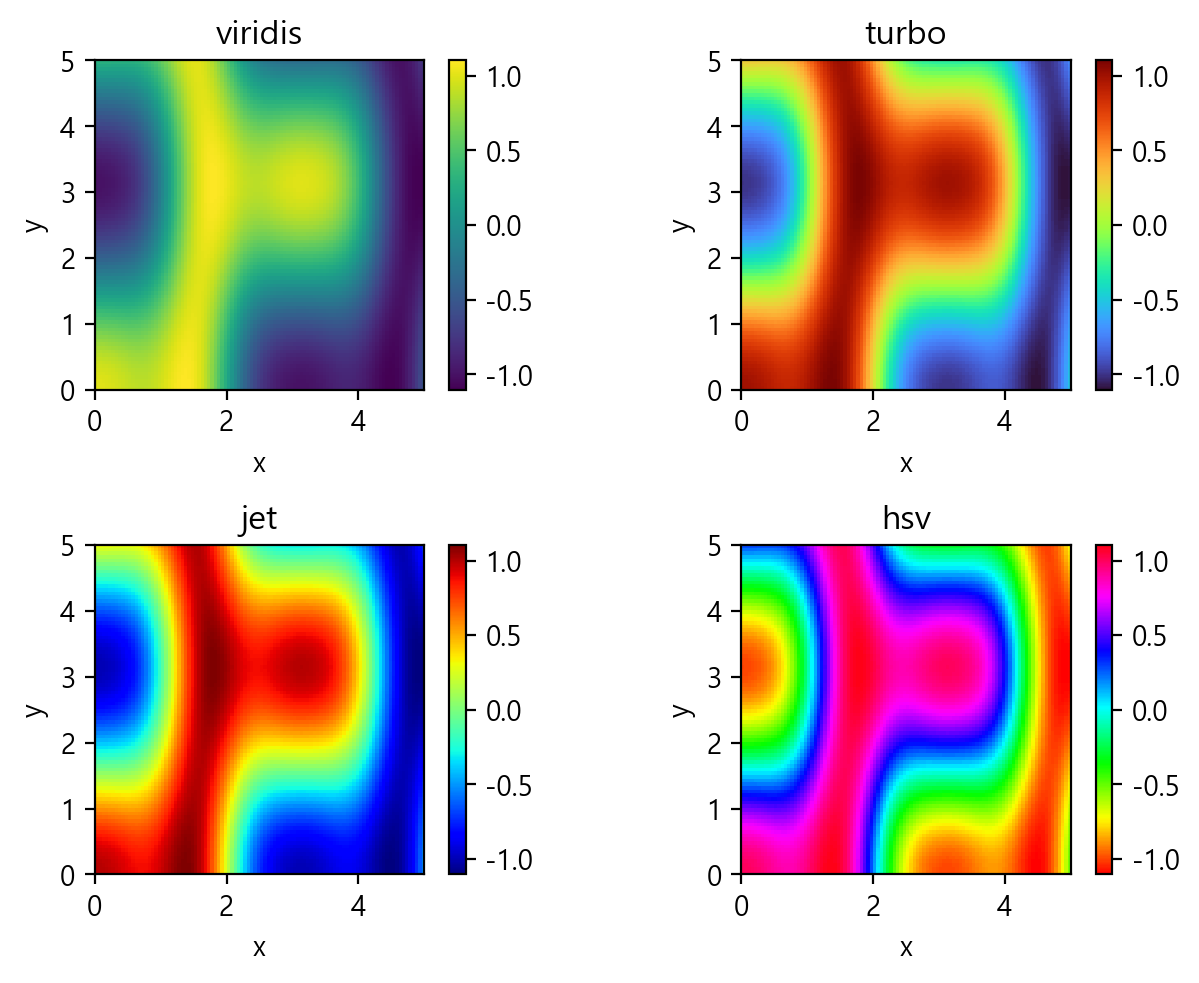

In [37]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 90)

X, Y = np.meshgrid(x, y)
Z = np.sin(X) ** 5 + np.cos(X) * np.cos(Y)

fig = plt.figure()
subfigs = fig.subfigures(2, 2)
for cmap, subfig in zip(["viridis", "turbo", "jet", "hsv"], subfigs.flat):
    ax = subfig.subplots()
    image = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin="lower", cmap=cmap)
    subfig.colorbar(image, ax=ax)
    ax.set(
        xlabel="x",
        ylabel="y",
        title=cmap,
    )
pass

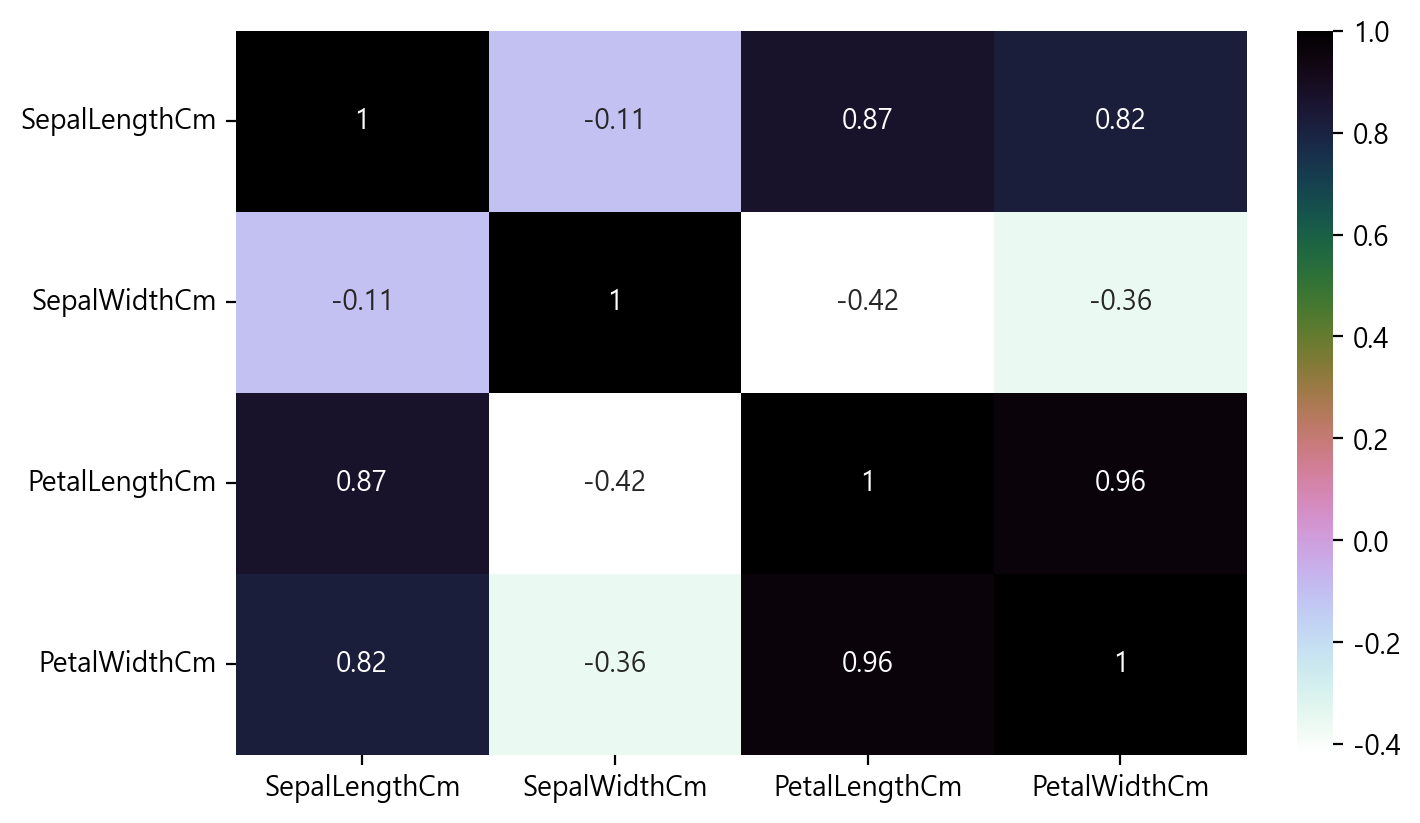

In [38]:
#kaggle
plt.figure(figsize=(7,4)) 
sns.heatmap(iris[iris.columns[:-1]].corr(),
            annot=True,
            cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [39]:
corr = iris[iris.columns[:-1]].corr().to_numpy()
mask = np.triu(np.ones_like(corr), k=1)

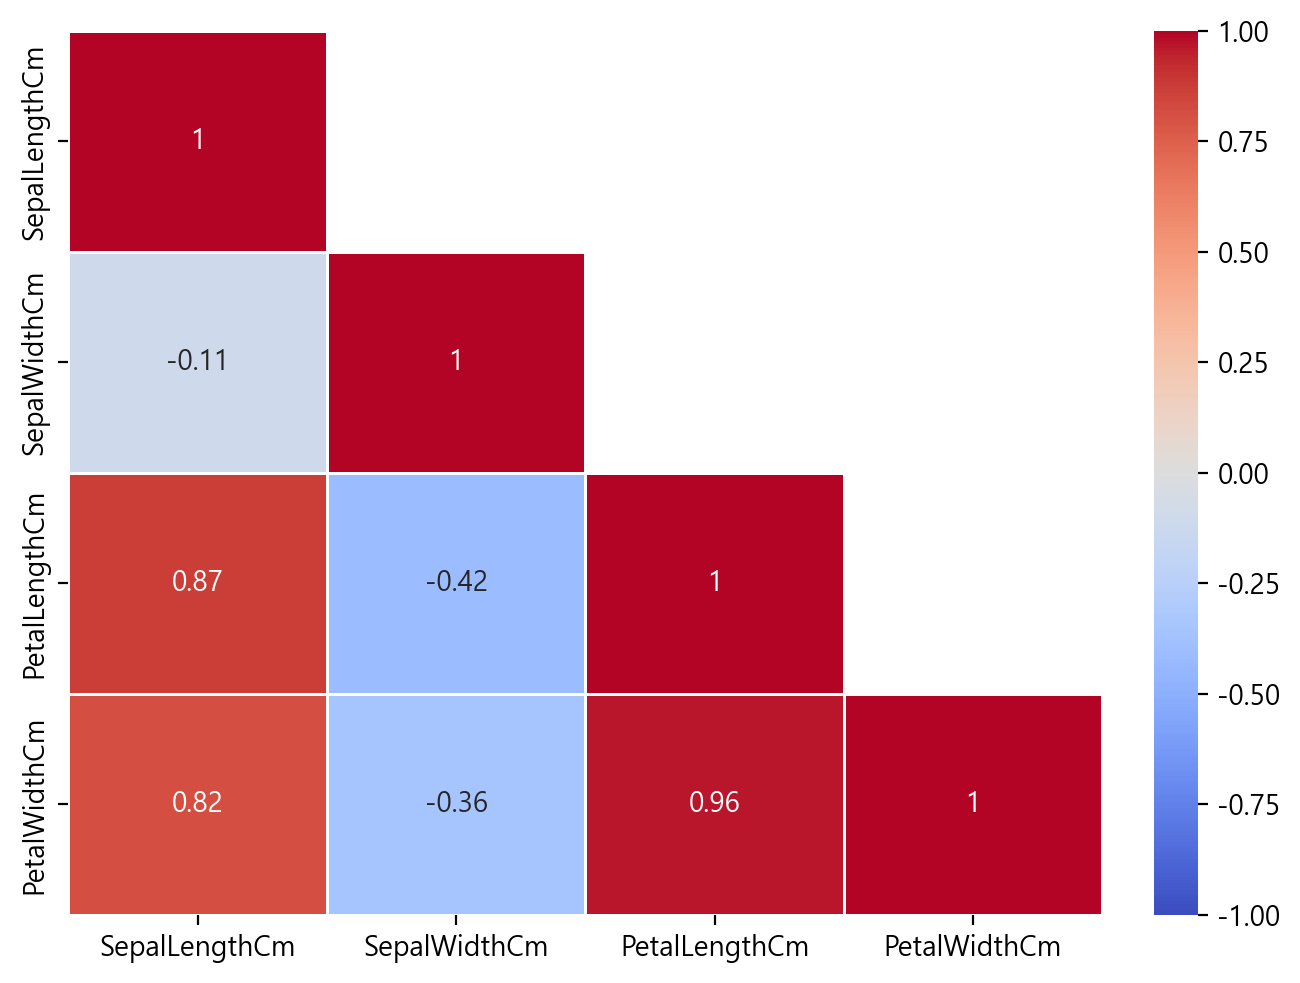

In [40]:
## seaborn을 이용해서 iris 데이터의 heatmap을 그리시오
fig, ax = plt.subplots() 
sns.heatmap(iris[iris.columns[:-1]].corr(),
            annot=True,
            cmap='coolwarm',
            vmin = -1,
            vmax = 1,
            linewidths = 0.5,
            mask = mask); 


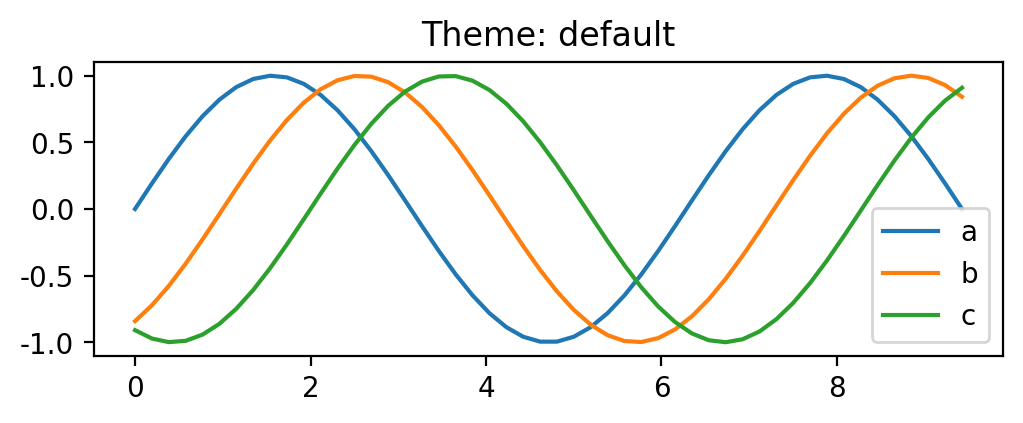

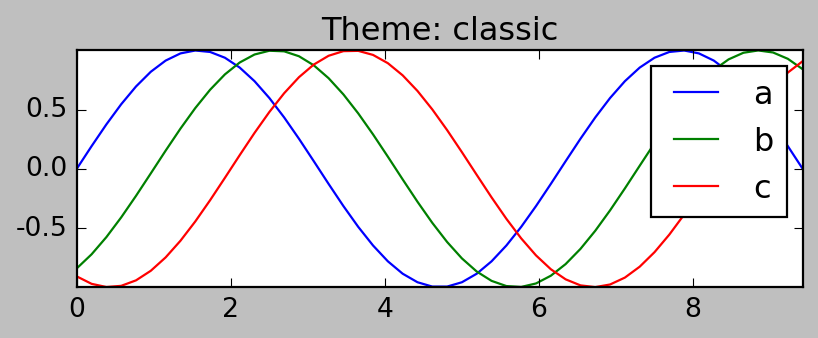

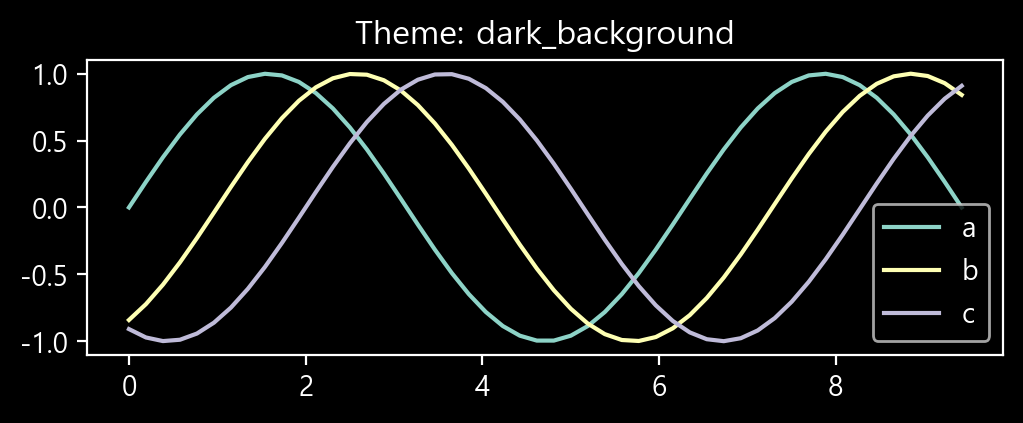

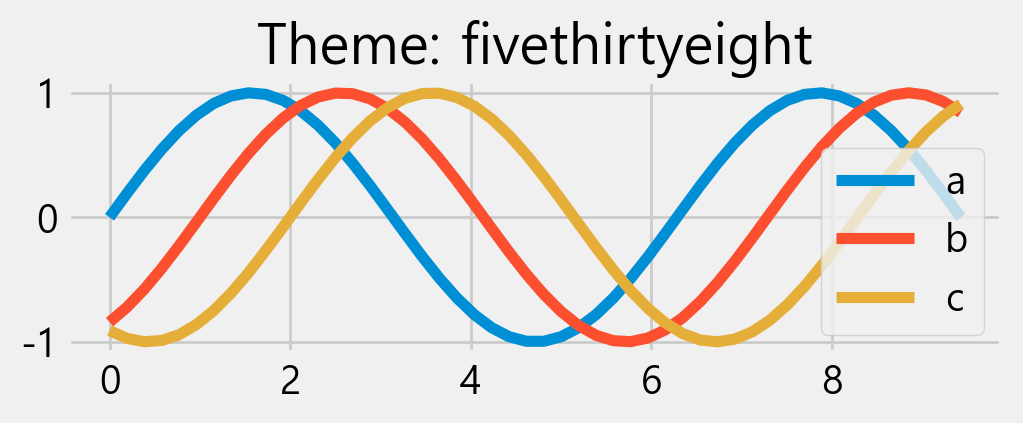

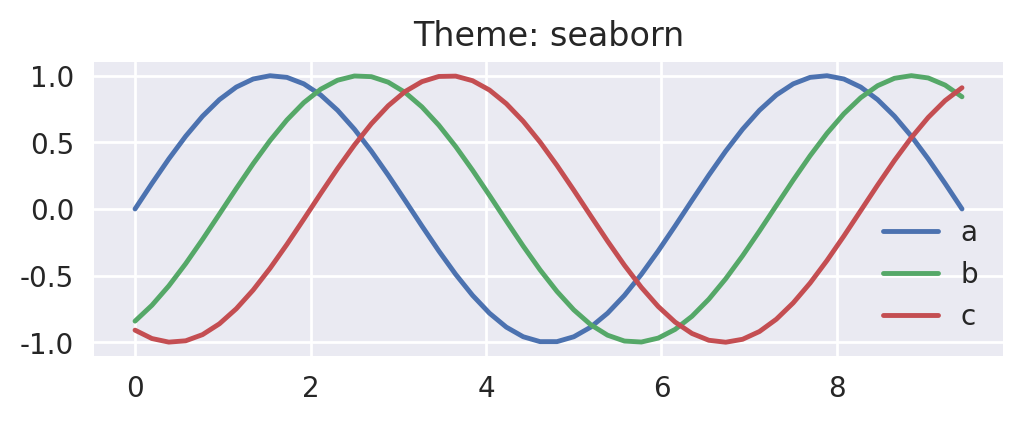

In [41]:
x = np.linspace(0, 3 * np.pi)
y1 = np.sin(x)
y2 = np.sin(x - 1)
y3 = np.sin(x - 2)

for theme in ["default", "classic", "dark_background", "fivethirtyeight", "seaborn"]:
    with plt.style.context(theme):
        fig, ax = plt.subplots(figsize=(5, 2), constrained_layout=True)

        ax.plot(x, y1, label="a")
        ax.plot(x, y2, label="b")
        ax.plot(x, y3, label="c")
        ax.legend()
        ax.set_title(f"Theme: {theme}")

## 파일로 저장하기

**벡터 그래픽 대 래스터(비트맵)**

![](https://media.defense.gov/2020/Jun/17/2002317348/1920/6000/0/200617-D-ZW071-0002.JPG)

― [Vector vs. Raster Images: Choosing the Right Format](https://pavilion.dinfos.edu/Article/Article/2223089/vector-vs-raster-images-choosing-the-right-format/)

- 벡터 그래픽
    -   점, 곡선, 다각형 등 물체 정보를 저장, 출력할 때 계산(모니터라면 픽셀)
    -   확대를 해도 (도형 정보를 다시 계산해서 그리므로) 품질이 유지됨
    -   포맷: AI, SVG, PDF(?) 등
    -   프로그램: Illustrator, Inkscape 등
-   래스터 그래픽
    -   격자 형태의 화소(pixel)의 색깔 모음을 저장
    -   정해진 크기의 데이터만 갖고 있으므로, 확대하면 품질이 떨어짐
    -   손실 압축 방식과 비손실 압축 방식
    -   포맷: BMP, JPG, PNG 등
    -   프로그램: Photoshop, GIMP 등

**(인쇄) 해상도**

디지털 이미지의 경우 보통은 가로, 세로의 픽셀 수를 신경쓰지만, Matplotlib에서 그림 크기를 결정할 때의 기준은 인치입니다. (예: `plt.subplots(figsize=(6.4, 4.8))`)
그림을 래스터 그래픽 파일로 저장할 때, DPI(Dots per inch)를 정해주면 같은 모양의 그림의 해상도를 다르게 할 수 있습니다. (Matplotlib의 기본값은 100)
논문을 쓸 때 보통 저널에서는 가능한 경우엔 벡터 그래픽을, 불가능한 경우 600 DPI 이상의 래스터 그래픽을 추천합니다.

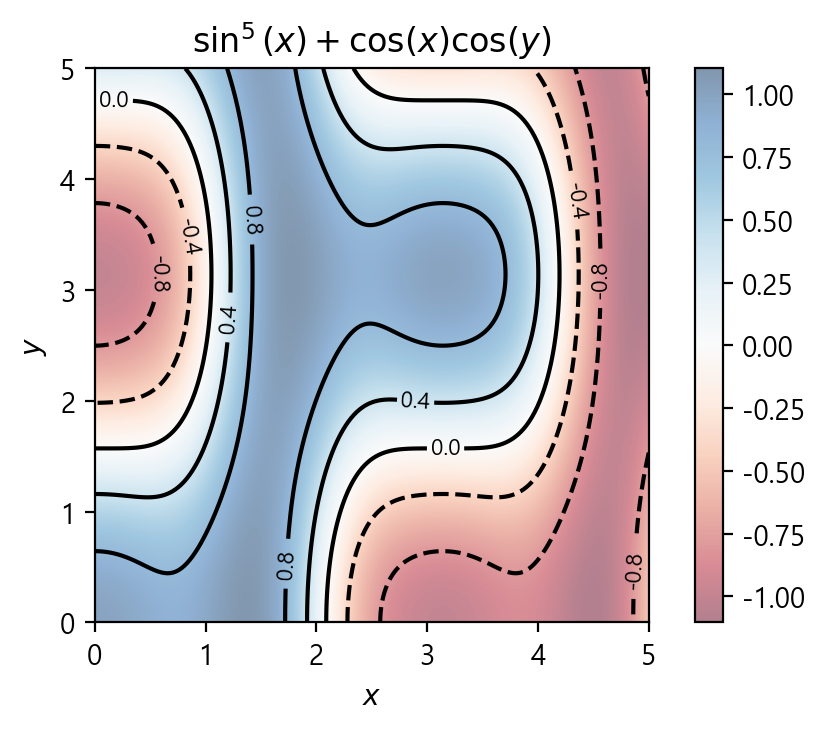

In [42]:
x = np.linspace(0, 5, 200)
y = np.linspace(0, 5, 199)

X, Y = np.meshgrid(x, y)
Z = np.sin(X) ** 5 + np.cos(X) * np.cos(Y)

cm_per_inch = 2.54
fig, ax = plt.subplots(figsize=(12 / cm_per_inch, 9 / cm_per_inch))

contours = ax.contour(X, Y, Z, 3, colors="black", levels=5)
ax.clabel(contours, inline=True, fontsize=8)
vlim = np.abs(Z).max()
im = ax.imshow(
    Z,
    extent=[x[0], x[-1], y[0], y[-1]],
    origin="lower",
    vmin=-vlim,
    vmax=vlim,
    cmap="RdBu",
    alpha=0.5,
)
ax.set(
    xlabel=R"$x$",
    ylabel=R"$y$",
    title=R"$\sin^5(x) + \cos(x) \cos(y)$",
)
fig.colorbar(im)

#fig.savefig("image.png")
#fig.savefig("image-transparent.png", transparent=True)
#fig.savefig("image-600dpi.png", dpi=600)
#fig.savefig("image.jpg")
#fig.savefig("image.svg")
#fig.savefig("image.pdf")

## 더 보기

-   [Data Viz Project](https://datavizproject.com/) (다양한 종류의 그래프 예제)
-   [Seaborn](https://seaborn.pydata.org/) (Matplotlib을 기반으로 고레벨 API, 추가 그래프 유형 제공)
-   [Bokeh](https://bokeh.org/) (웹 브라우저에서 동작하는 인터랙티브 시각화)
-   [HoloViz](https://holoviz.org/) (Matplotlib이나 Bokeh를 백엔드로 사용하고, HoloViews, GeoViews, Datashader 등 다양한 고레벨 툴을 제공하는 라이브러리 모음)